# Settings

In [1]:
#install.packages("forecast")
library(forecast)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [2]:
source("~/works/utils/r/myutils.r")

# ARIMA

https://www.quantstart.com/articles/Autoregressive-Integrated-Moving-Average-ARIMA-p-d-q-Models-for-Time-Series-Analysis/

## Simulation, Correlogram and Model Fitting

In [4]:
new.figsize(10,6)

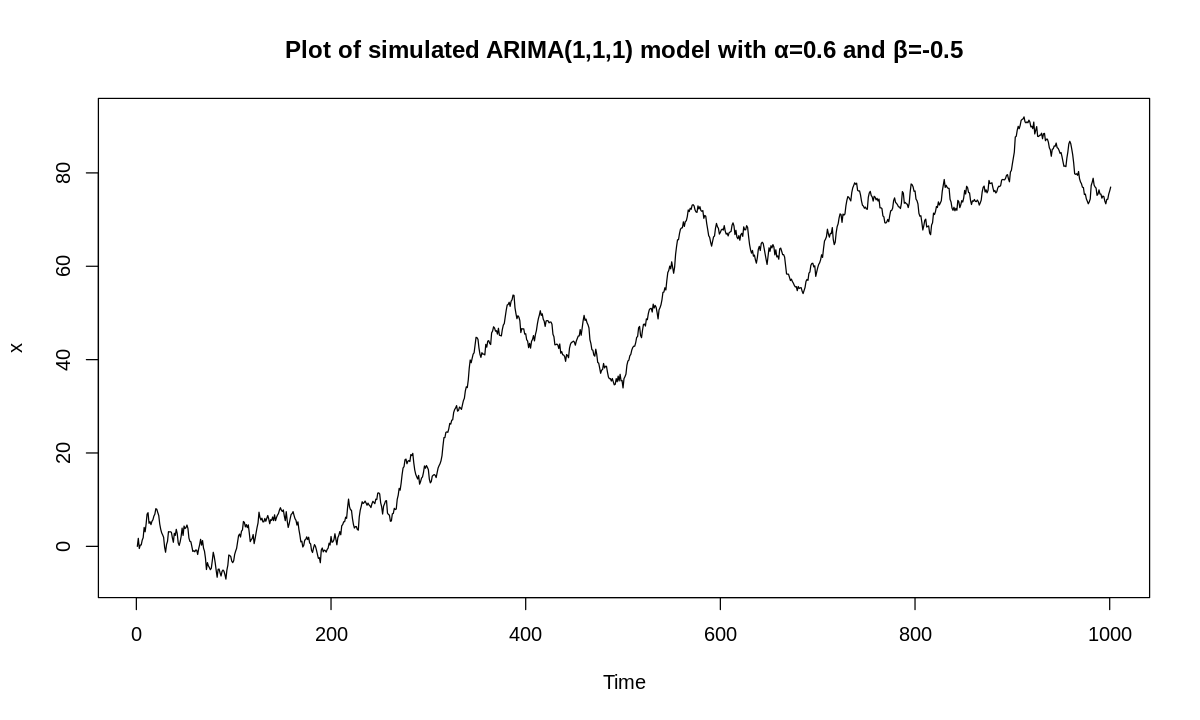

In [11]:
set.seed(2)
x <- arima.sim(list(order = c(1,1,1), ar = 0.6, ma=-0.5), n = 1000)
plot(x, 
     main='Plot of simulated ARIMA(1,1,1) model with α=0.6 and β=-0.5'
     #sub='Plot of simulated ARIMA(1,1,1) model with α=0.6 and β=-0.5'
    )

In [46]:
x.arima <- arima(x, order=c(1, 1, 1))
x.arima


Call:
arima(x = x, order = c(1, 1, 1))

Coefficients:
         ar1      ma1
      0.6470  -0.5165
s.e.  0.1065   0.1189

sigma^2 estimated as 1.027:  log likelihood = -1432.09,  aic = 2870.18

95% confidence intervals

In [91]:
#x.arima[0:20]
#typeof(x.arima$coef)
#is.atomic(x.arima$coef)

ar1 <- x.arima$coef[['ar1']]
se_ar1 <- x.arima$var.coef[1]^.5
ma1 <- x.arima$coef[['ma1']]
se_ma1 <- x.arima$var.coef[4]^.5

ar1 + c(-1.96, 1.96)*se_ar1
ma1 + c(-1.96, 1.96)*se_ma1

[1] 0.4382411 0.8558227

[1] -0.7495459 -0.2834130

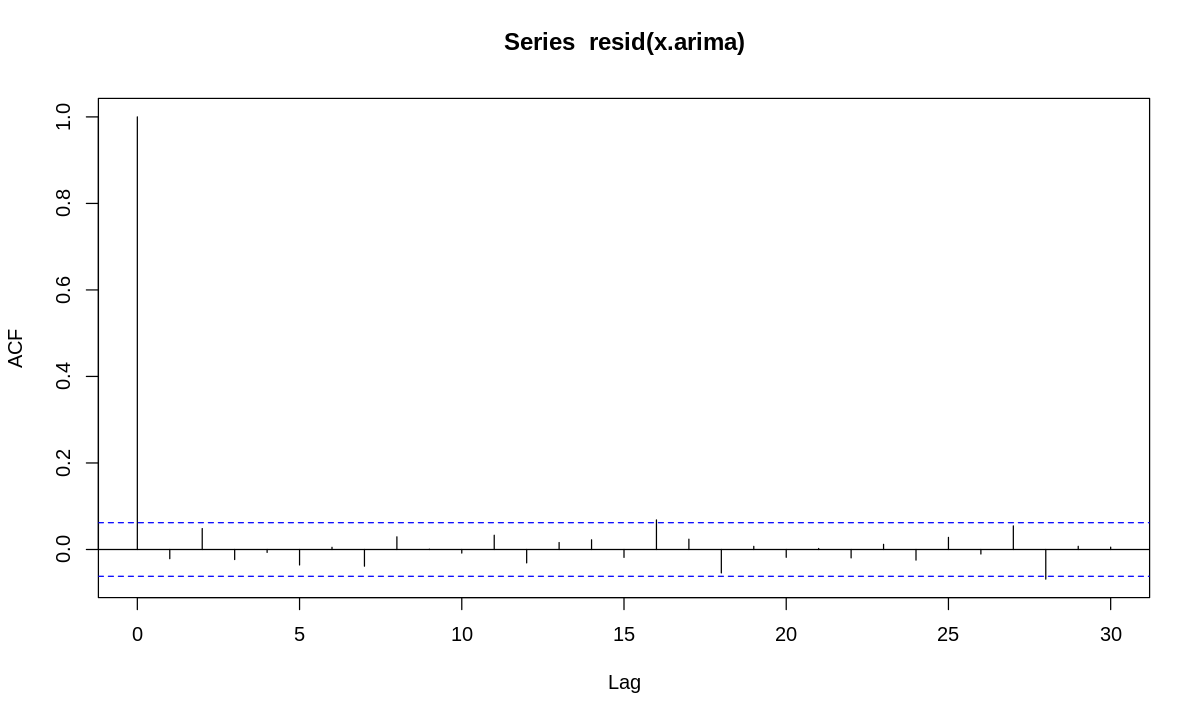

In [ ]:
acf(resid(x.arima))

In [15]:
Box.test(resid(x.arima), lag=20, type="Ljung-Box")


	Box-Ljung test

data:  resid(x.arima)
X-squared = 19.041, df = 20, p-value = 0.5191


## Financial Data and Prediction

### Amazon

In [16]:
require(quantmod)

In [100]:
getSymbols("AMZN", from="2013-01-01", to='2015-9-1')
amzn = diff(log(Cl(AMZN)))

[1] "AMZN"

In [101]:
length(amzn)

[1] 671

In [102]:
azfinal.aic <- Inf
azfinal.order <- c(0,0,0)
for (p in 1:4) for (d in 0:1) for (q in 1:4) {
    azcurrent.aic <- AIC(arima(amzn, order=c(p, d, q)))
    if (azcurrent.aic < azfinal.aic) {
        azfinal.aic <- azcurrent.aic
        azfinal.order <- c(p, d, q)
        azfinal.arima <- arima(amzn, order=azfinal.order)
    }
}

Warning message in arima(amzn, order = c(p, d, q)):
“possible convergence problem: optim gave code = 1”
Warning message in arima(amzn, order = c(p, d, q)):
“possible convergence problem: optim gave code = 1”
Warning message in arima(amzn, order = azfinal.order):
“possible convergence problem: optim gave code = 1”
Warning message in arima(amzn, order = c(p, d, q)):
“possible convergence problem: optim gave code = 1”
Warning message in arima(amzn, order = c(p, d, q)):
“possible convergence problem: optim gave code = 1”
Warning message in arima(amzn, order = c(p, d, q)):
“possible convergence problem: optim gave code = 1”
Warning message in arima(amzn, order = c(p, d, q)):
“possible convergence problem: optim gave code = 1”


In [103]:
azfinal.order
azfinal.aic

[1] 3 0 3

[1] -3354.724

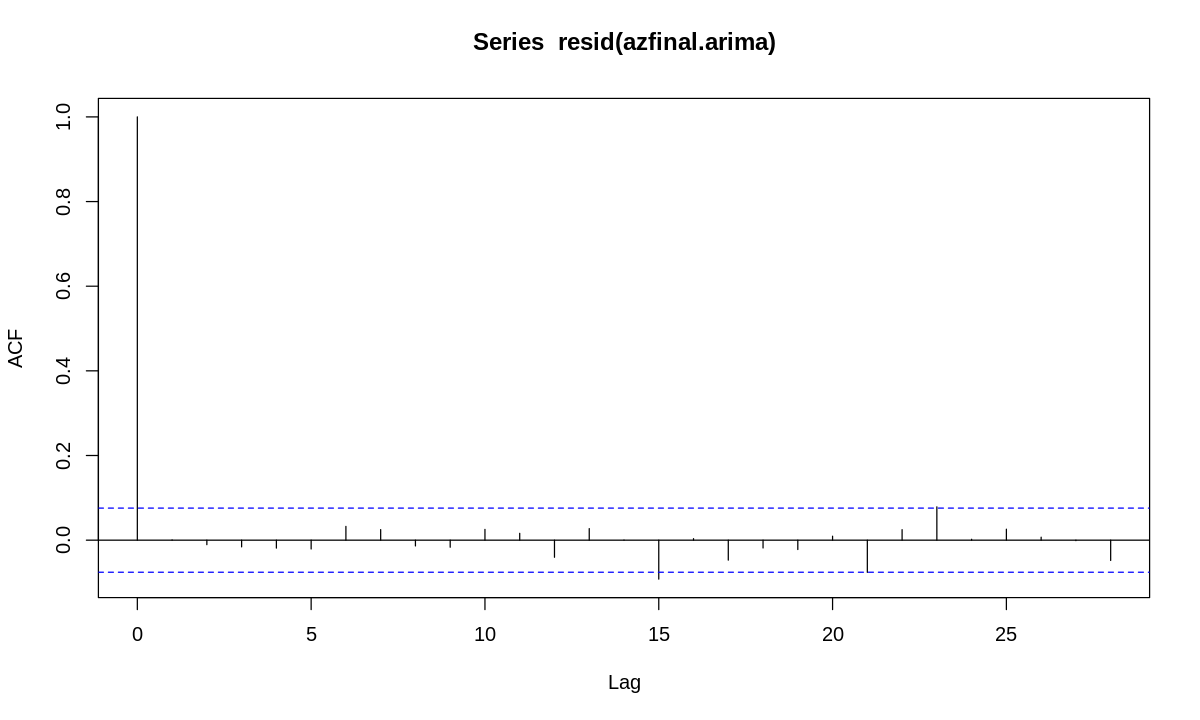

In [104]:
acf(resid(azfinal.arima), na.action=na.omit)

In [105]:
Box.test(resid(azfinal.arima), lag=20, type="Ljung-Box")


	Box-Ljung test

data:  resid(azfinal.arima)
X-squared = 12.468, df = 20, p-value = 0.899


In [108]:
new.figsize(10,8)

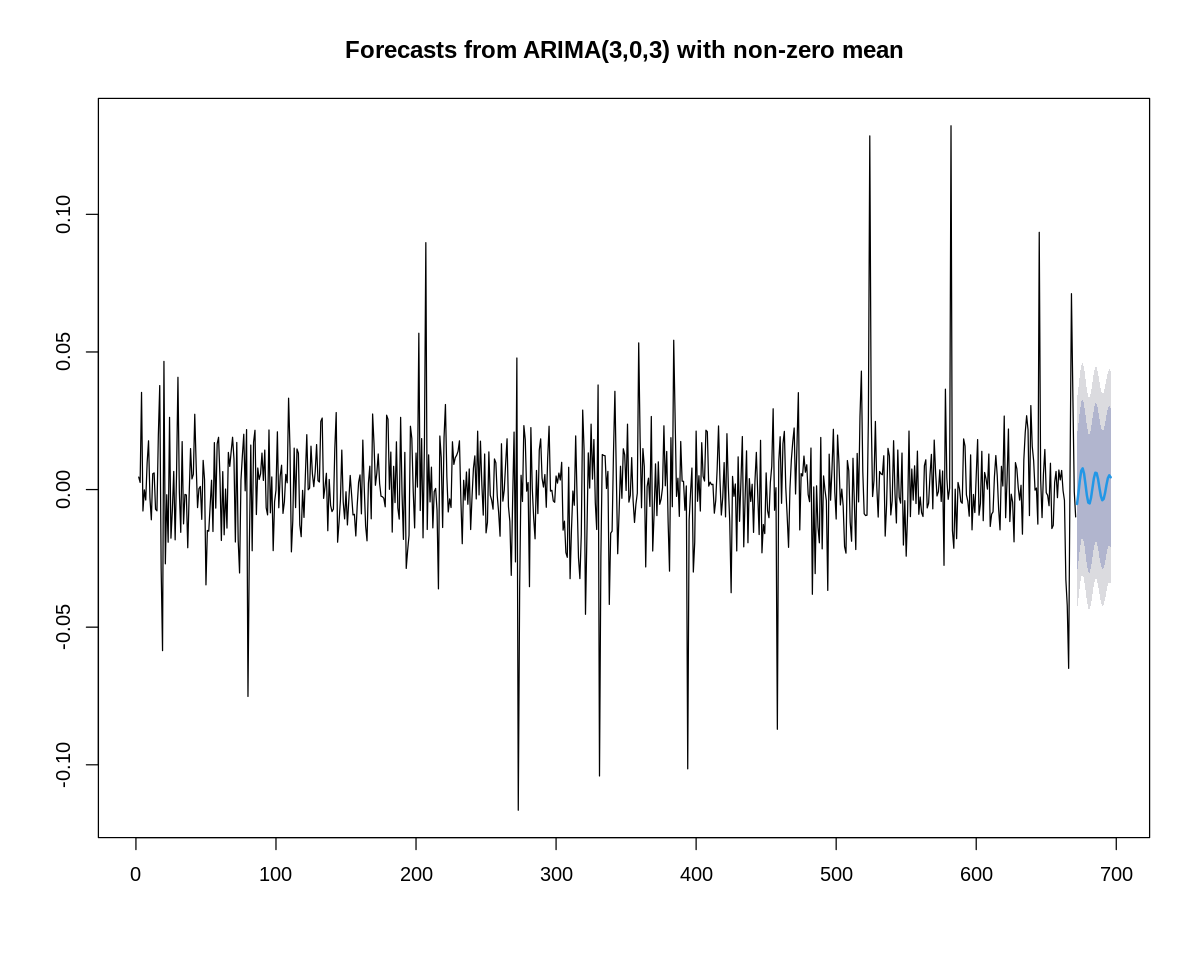

In [109]:
plot(forecast(azfinal.arima, h=25), 
     #xlim=c(2200, NA) # Error in plot.window(xlim, ylim, log, ...): need finite 'xlim' values
     #xlim=c(2200, 2450)
    )

#### auto.arima for comparison

In [110]:
aa <- auto.arima(amzn, seasonal=FALSE)
aa

Series: amzn 
ARIMA(0,0,0) with zero mean 

sigma^2 = 0.0003902:  log likelihood = 1678.64
AIC=-3355.27   AICc=-3355.26   BIC=-3350.76

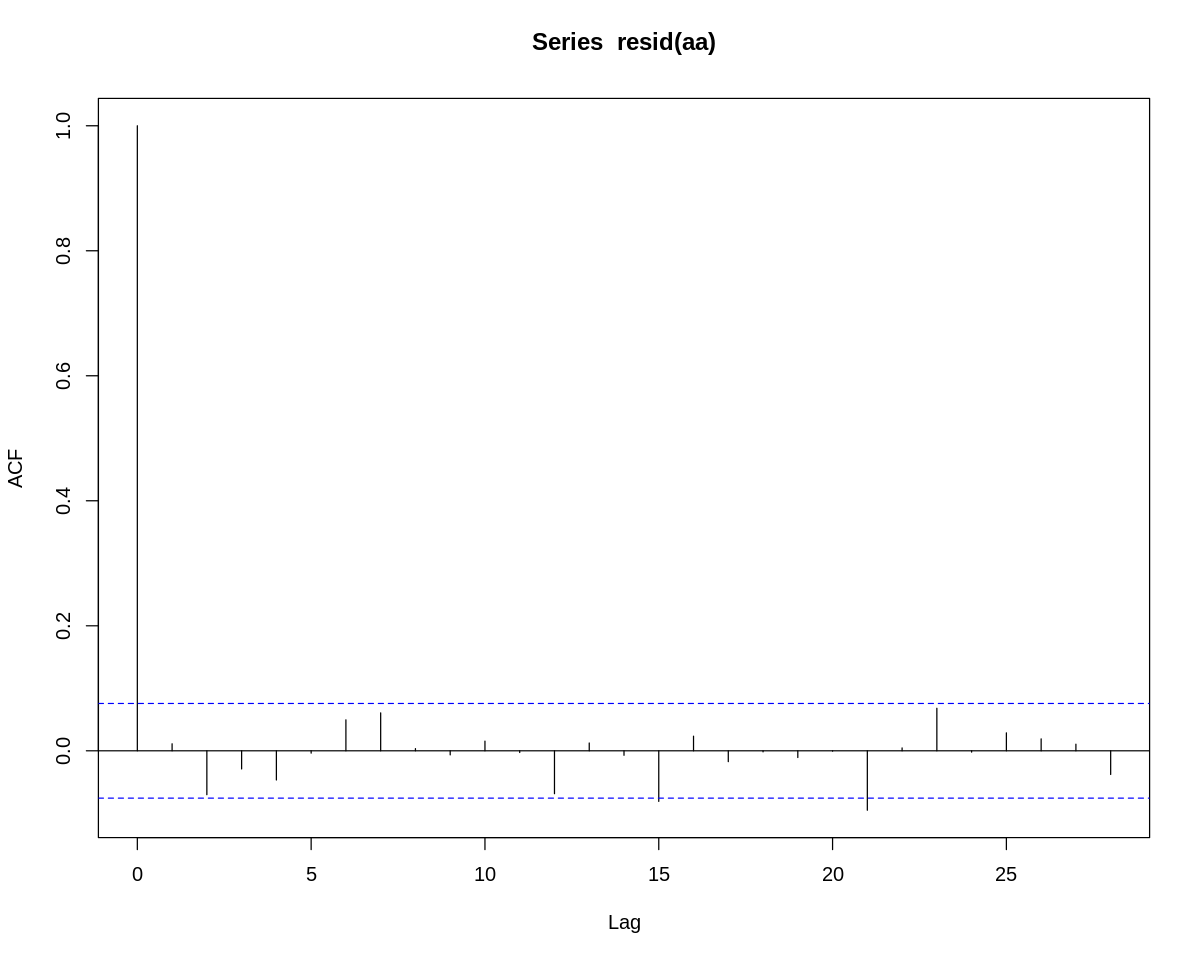

In [111]:
acf(resid(aa), na.action=na.omit)

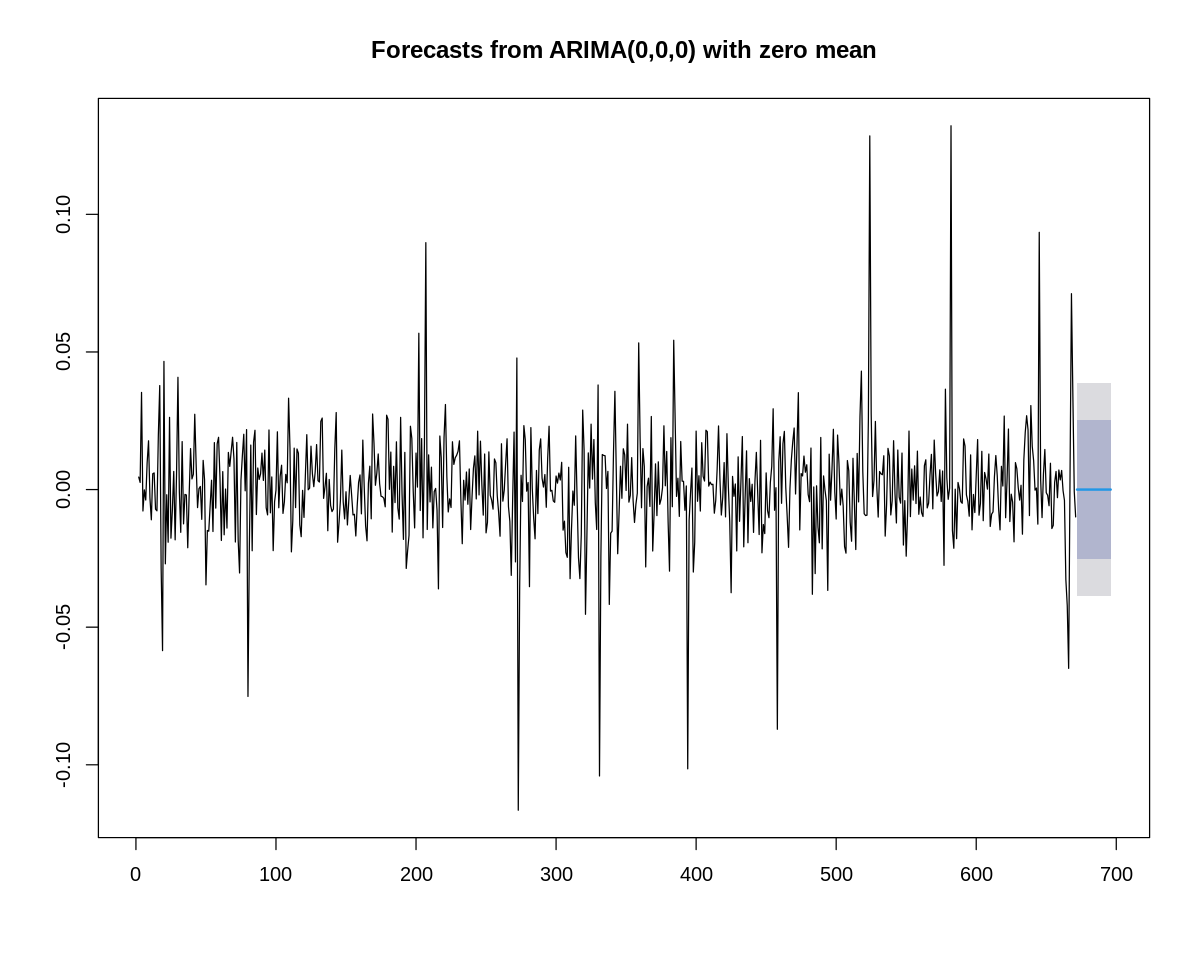

In [113]:
plot(forecast(aa, h=25), 
     #xlim=c(2200, NA) # Error in plot.window(xlim, ylim, log, ...): need finite 'xlim' values
     #xlim=c(2200, 2450)
    )

### S&P500

In [114]:
getSymbols("^GSPC", from="2013-01-01", to="2015-09-01")
sp = diff(log(Cl(GSPC)))

[1] "^GSPC"

In [115]:
spfinal.aic <- Inf
spfinal.order <- c(0,0,0)
for (p in 1:4) for (d in 0:1) for (q in 1:4) {
    spcurrent.aic <- AIC(arima(sp, order=c(p, d, q)))
    if (spcurrent.aic < spfinal.aic) {
        spfinal.aic <- spcurrent.aic
        spfinal.order <- c(p, d, q)
        spfinal.arima <- arima(sp, order=spfinal.order)
    }
}

Warning message in log(s2):
“NaNs produced”
Warning message in log(s2):
“NaNs produced”
Warning message in arima(sp, order = c(p, d, q)):
“possible convergence problem: optim gave code = 1”
Warning message in log(s2):
“NaNs produced”
Warning message in log(s2):
“NaNs produced”
Warning message in log(s2):
“NaNs produced”
Warning message in log(s2):
“NaNs produced”


In [116]:
spfinal.order

[1] 2 0 1

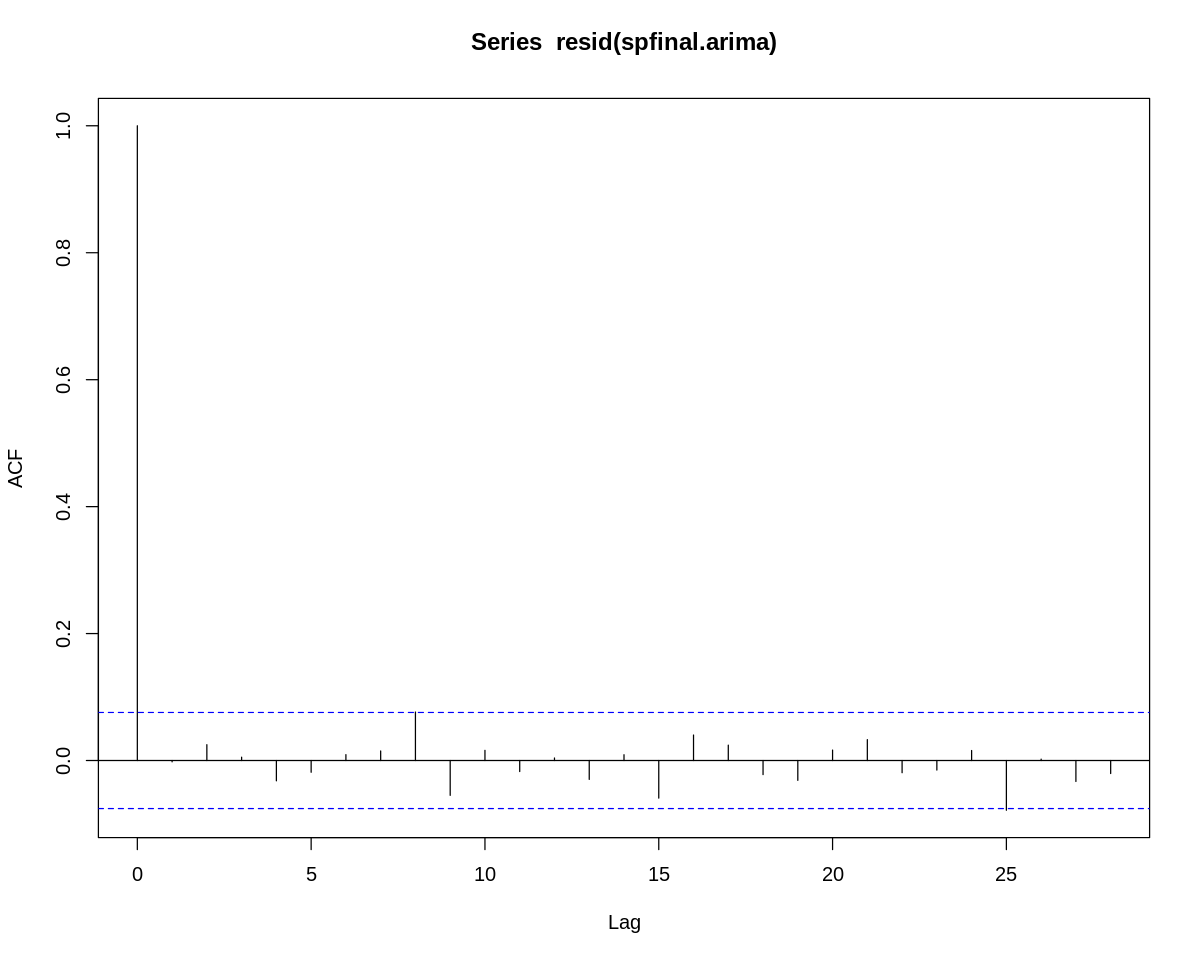

In [117]:
acf(resid(spfinal.arima), na.action=na.omit)

In [118]:
Box.test(resid(spfinal.arima), lag=20, type="Ljung-Box")


	Box-Ljung test

data:  resid(spfinal.arima)
X-squared = 13.77, df = 20, p-value = 0.842


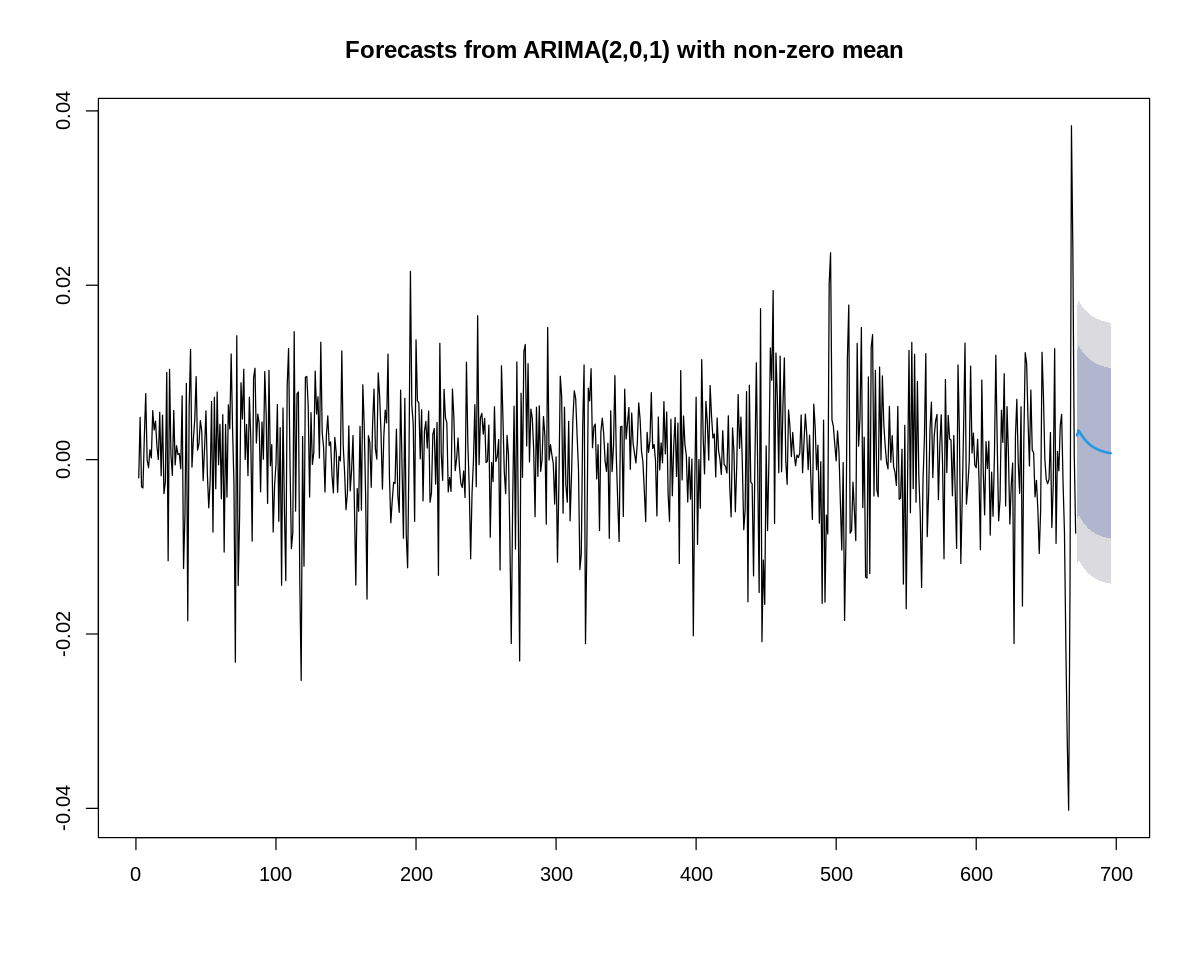

In [119]:
plot(forecast(spfinal.arima, h=25))

# GARCH

https://www.quantstart.com/articles/Generalised-Autoregressive-Conditional-Heteroskedasticity-GARCH-p-q-Models-for-Time-Series-Analysis/

## Simulations, Correlograms and Model Fittings

In [120]:
set.seed(2)
a0 <- 0.2
a1 <- 0.5
b1 <- 0.3
w <- rnorm(10000)
eps <- rep(0, 10000)
sigsq <- rep(0, 10000)
for (i in 2:10000) {
    sigsq[i] <- a0 + a1 * (eps[i-1]^2) + b1 * sigsq[i-1]
    eps[i] <- w[i]*sqrt(sigsq[i])
}

In [124]:
new.figsize(10,6)

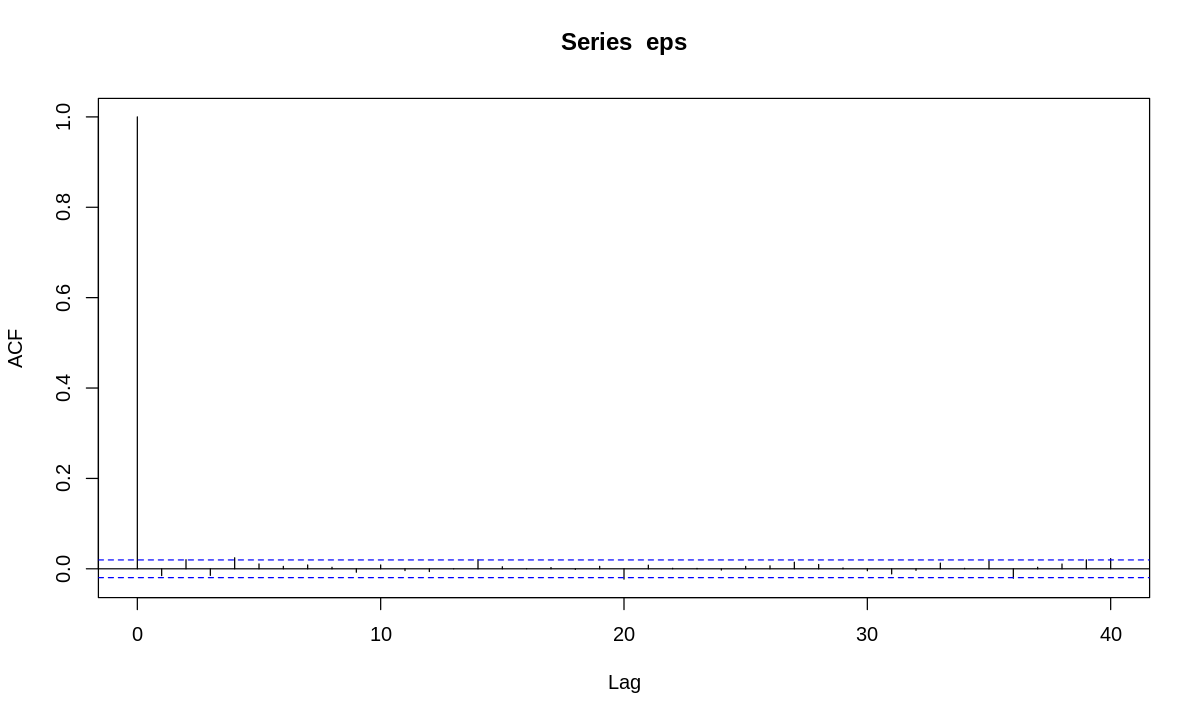

In [125]:
acf(eps)

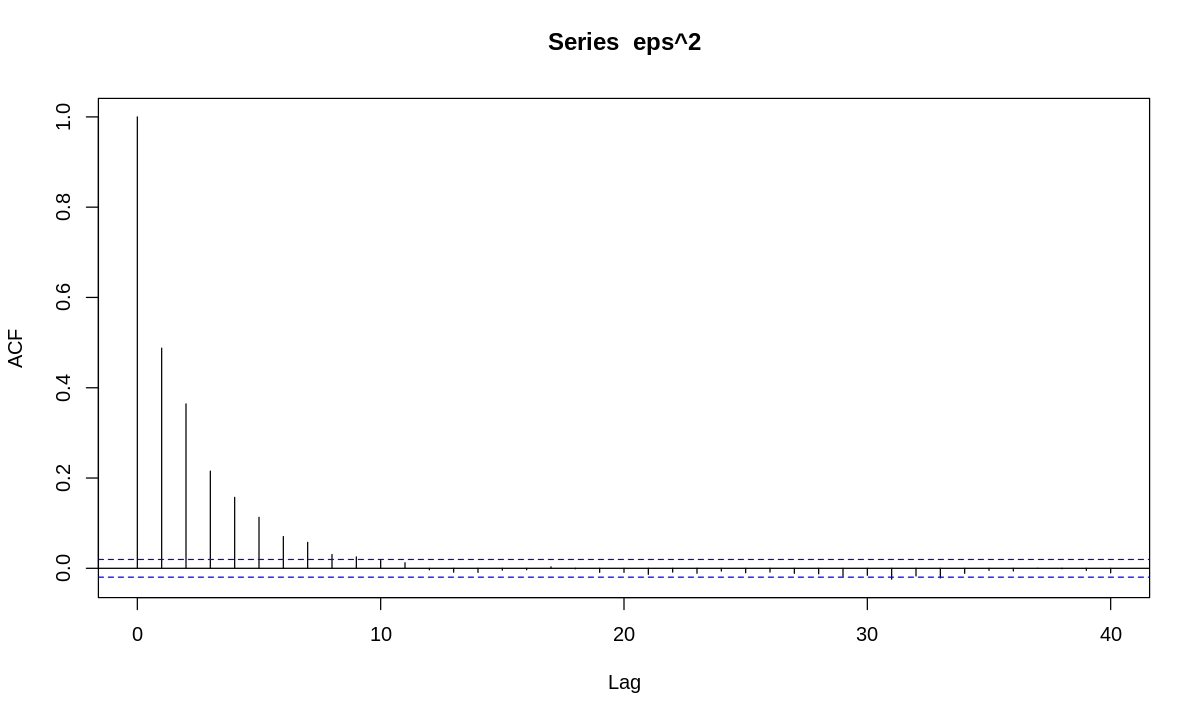

In [126]:
acf(eps^2)

In [127]:
require(tseries)

Loading required package: tseries



In [128]:
eps.garch <- garch(eps, trace=FALSE)
confint(eps.garch)

,2.5 %,97.5 %
a0,0.1786255,0.2172683
a1,0.4271900,0.5044903
b1,0.2861566,0.3602687


## Financial Data
- FTSE 100 index of the largest UK companies by market capitalisation

In [133]:
require(quantmod)
getSymbols("^FTSE", to="2015-09-01")

Warning message:
“^FTSE contains missing values. Some functions will not work if objects contain missing values in the middle of the series. Consider using na.omit(), na.approx(), na.fill(), etc to remove or replace them.”


[1] "^FTSE"

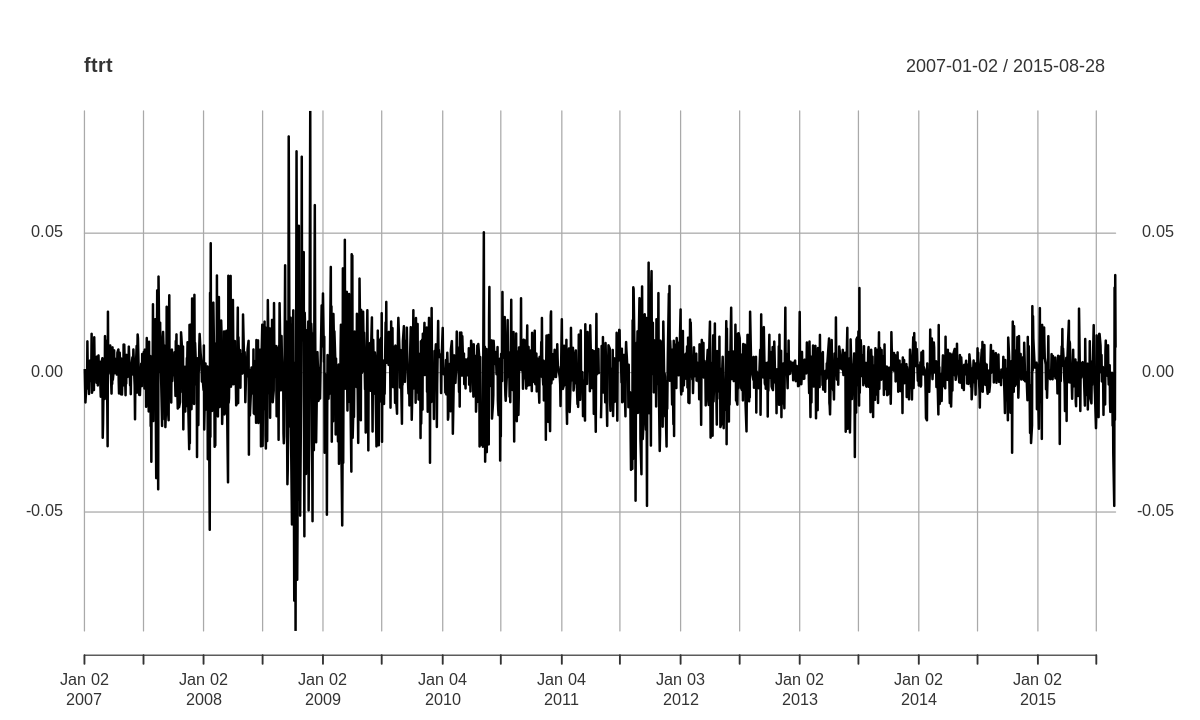

In [134]:
ftrt = diff(log(Cl(FTSE)))
plot(ftrt)

In [135]:
ft <- as.numeric(ftrt)
ft <- ft[!is.na(ft)]

In [136]:
ftfinal.aic <- Inf
ftfinal.order <- c(0,0,0)
for (p in 1:4) for (d in 0:1) for (q in 1:4) {
    ftcurrent.aic <- AIC(arima(ft, order=c(p, d, q)))
    if (ftcurrent.aic < ftfinal.aic) {
        ftfinal.aic <- ftcurrent.aic
        ftfinal.order <- c(p, d, q)
        ftfinal.arima <- arima(ft, order=ftfinal.order)
    }
}

Warning message in arima(ft, order = c(p, d, q)):
“possible convergence problem: optim gave code = 1”
Warning message in arima(ft, order = ftfinal.order):
“possible convergence problem: optim gave code = 1”


In [137]:
ftfinal.order

[1] 4 0 4

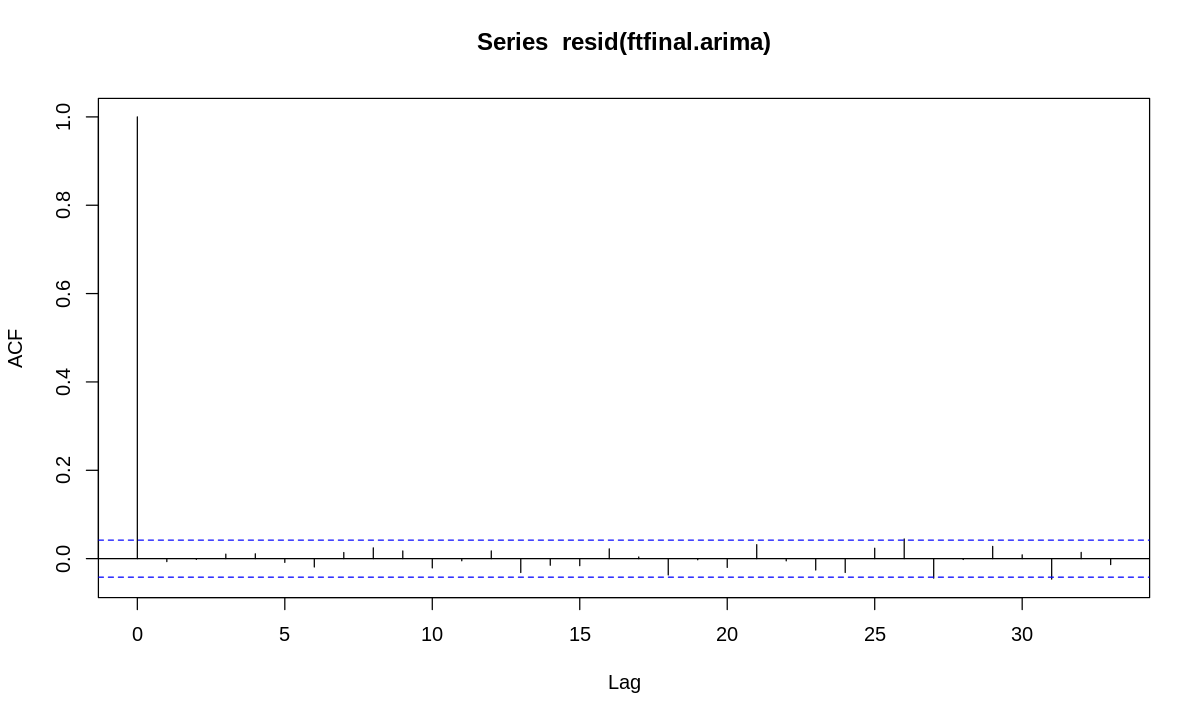

In [138]:
acf(resid(ftfinal.arima))

conditional heteroskedastic behaviour is present in the diff log return series of the FTSE100.

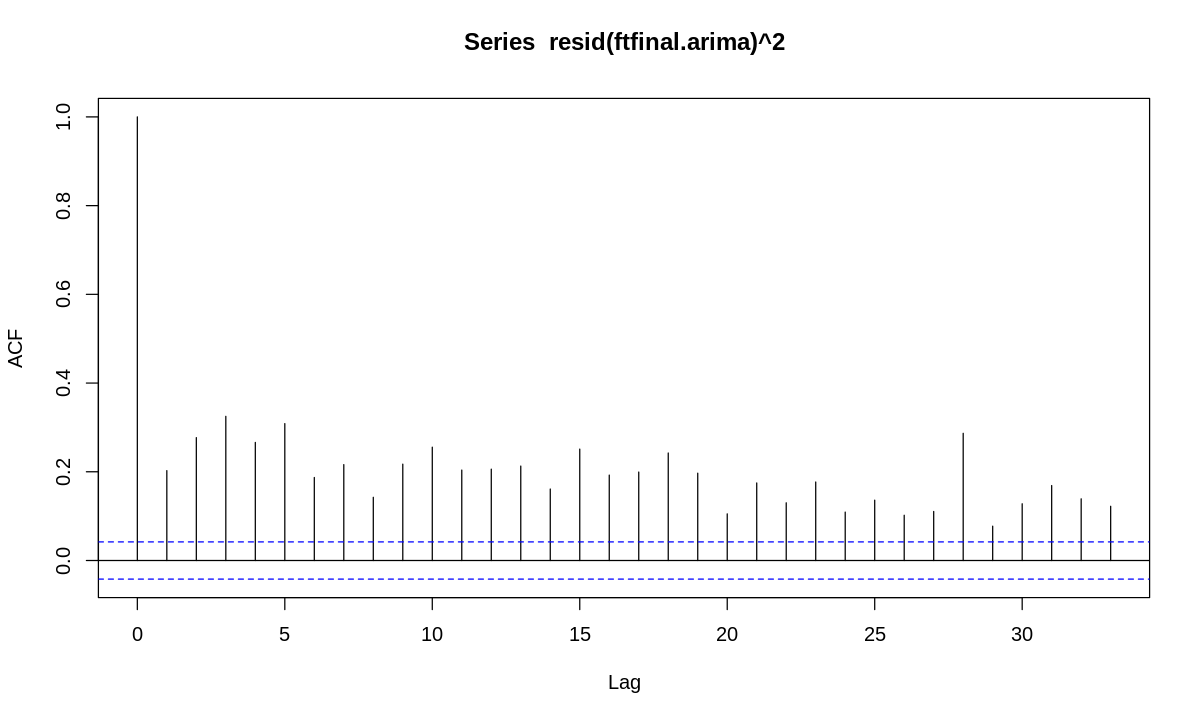

In [139]:
acf(resid(ftfinal.arima)^2)

In [140]:
ft.garch <- garch(ft, trace=F)
ft.res <- ft.garch$res[-1]

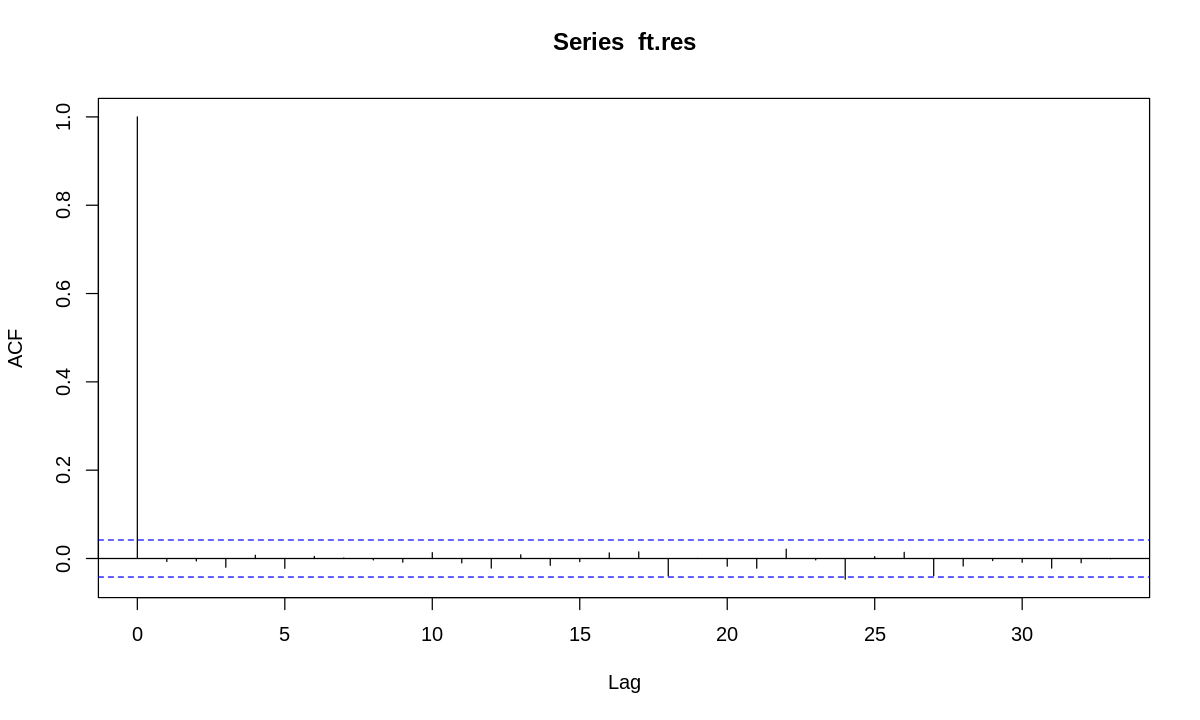

In [141]:
acf(ft.res)

Once again, we have what looks like a realisation of a discrete white noise process, indicating that we have "explained" the serial correlation present in the squared residuals with an appropriate mixture of ARIMA(p,d,q) and GARCH(p,q).

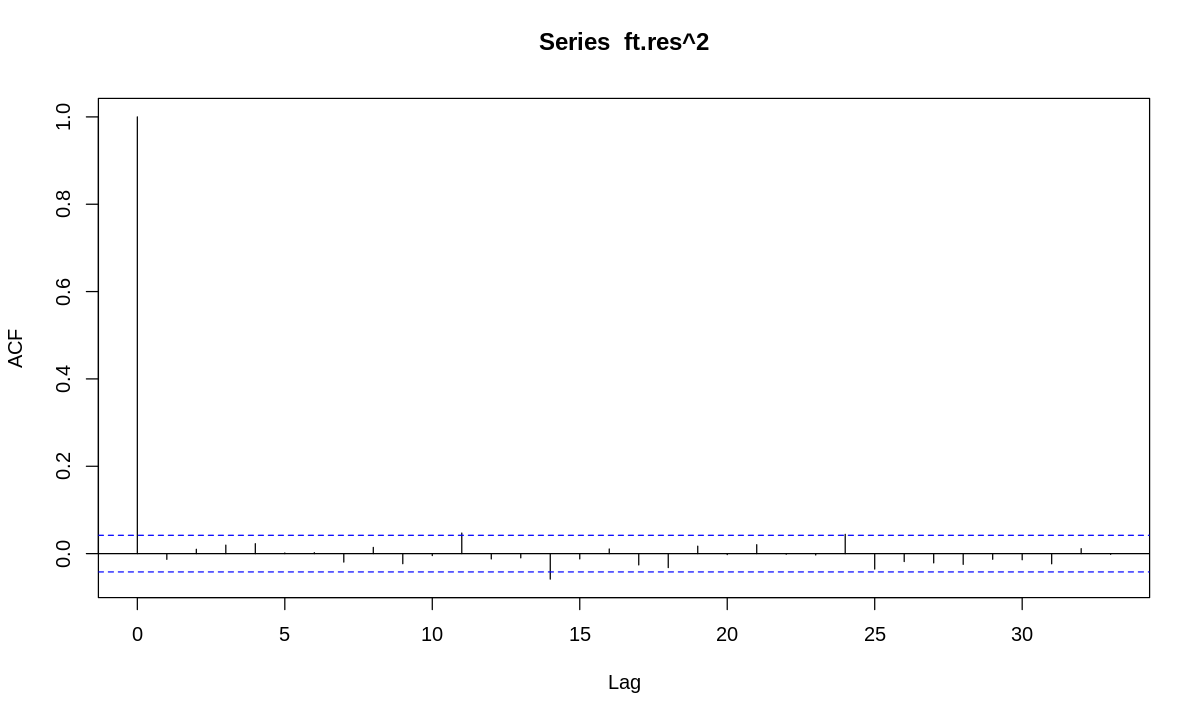

In [142]:
acf(ft.res^2)

# ARIMA + GARCH Strategy

https://www.quantstart.com/articles/ARIMA-GARCH-Trading-Strategy-on-the-SP500-Stock-Market-Index-Using-R/

## Settings

In [4]:
#install.packages("timeSeries")
#install.packages("rugarch")

Installing package into ‘/home/jupyter/.R/library’
(as ‘lib’ is unspecified)

Installing package into ‘/home/jupyter/.R/library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘truncnorm’, ‘FNN’, ‘kernlab’, ‘mclust’, ‘multicool’, ‘mvtnorm’, ‘pracma’, ‘DistributionUtils’, ‘GeneralizedHyperbolic’, ‘Rsolnp’, ‘ks’, ‘numDeriv’, ‘spd’, ‘chron’, ‘SkewHyperbolic’




In [3]:
library(quantmod)
library(lattice)
library(timeSeries)
library(rugarch)

Loading required package: xts

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: TTR

Loading required package: timeDate


Attaching package: ‘timeSeries’


The following object is masked from ‘package:zoo’:

    time<-


Loading required package: parallel


Attaching package: ‘rugarch’


The following object is masked from ‘package:stats’:

    sigma




In [4]:
library(forecast)

### User's

In [5]:
ag.forecast <- function(ret, foreLength, windowLength, lookahead) {

    # Create vectors to store the predictions
    fc.pred <- vector(mode="numeric", length=foreLength)
    fc.dates <- vector(mode="character", length=foreLength)
    
    # step to print output
    print.step <- round((foreLength+1)/5)

    start_time <- Sys.time()

    for (d in 1:(foreLength+1)) {

        # Obtain the S&P500 rolling window for this day
        retOffset <- ret[d:(windowLength+d)]

        # Fit the ARIMA model
        fit <- tryCatch(auto.arima(retOffset, seasonal=FALSE, 
                                   ic='aicc', 
                                   #ic='aic', 
                                   d=0, 
                                   trace=FALSE),
                        error=function(err) {FALSE},
                        warning=function(err) {FALSE} )

        if( !is.logical(fit) ) {
            final.order <- as.numeric(arimaorder(fit))
        } else {
            final.order <- c(0,0,0)
        }

        # Specify and fit the GARCH model
        spec <- ugarchspec(
            variance.model=list(garchOrder=c(1,1)),
            mean.model=list(armaOrder=c(final.order[1], final.order[3]), include.mean=T),
            distribution.model="sged"
        )
        fit <- tryCatch(ugarchfit(spec, retOffset, solver='hybrid'), 
                        error=function(e) {e}, 
                        warning=function(w) {w})

        # If the GARCH model does not converge, set the direction to "long" else
        # choose the correct forecast direction based on the returns prediction
        # Output the results to the screen and the forecasts vector
        if(is(fit, "warning")) {
            fc.pred[d] <- 0 # assume zero return
            fc.dates[d] <- as.character(index(tail(retOffset, 1)[1]))
        } else {
            fore <- ugarchforecast(fit, n.ahead=1)
            ind <- fore@forecast$seriesFor
            # save d + lookahead prediction at d date
            fc.pred[d] <- ind[1]
            fc.dates[d] <- colnames(ind)
        }

        if ((d %% print.step == 0) | (d == foreLength+1)) {
            a <- Sys.time() - start_time
            u <- attr(a, "units")
            v <- as.numeric(a)
            print(sprintf("%0.0f %% done (%0.0f %s).", 100 * d/(foreLength+1), v, u))
        }
    }

    pred <- xts(fc.pred, order.by=as.Date(fc.dates, "%Y-%m-%d"))
    colnames(pred) <- paste('prediction after', lookahead)
    return(pred)
}


ag.plot <- function(data, 
                    labels=c("ARIMA+GARCH", "Buy & Hold"),
                    colors=c("darkred", "darkblue")) {
    xyp <- xyplot( 
        data,
        superpose=T,
        col=colors,
        lwd=2,
        key=list(
            text=list(labels),
            lines=list(lwd=2, col=colors)
        )
    )
    return(xyp)
}


ag.plotvalues <- function(pred, ret, lookahead, label='S&P 500') {
    # merge first to set the period of ret same as that of pred
    result <- merge(pred, ret, all=F )
    # get value proportional to index from log return
    trueCurve <- cumsum(result[,2])
    # calc index prediction
    predCurve <- exp(result[,1]) * trueCurve
    # shift prediction for lookahead
    predCurve <- lag(predCurve, lookahead)
    predCurve <- predCurve[!is.na(predCurve)]  
    result <- merge(predCurve, trueCurve, all=F )
    xyp <- ag.plot(result, labels=c("ARIMA+GARCH", label))
    return(xyp)
}


ag.backtest <- function(pred, ret, lookahead) {
    if (dim(pred)[2]>1) stop("dim of pred is invalid.")
    
    # shift prediction to its realized day before merge with ret
    position <- lag(pred, lookahead)
    position <- pred[!is.na(position)]
    # define position
    position <- ifelse(position < 0, -1, ifelse(position > 0, 1, 0))
    # merge position with ret
    position <- merge(position, ret, all=F )
    # calc result of position
    result <- position[,1] * position[,2]

    # Create the backtests for ARIMA+GARCH and Buy & Hold
    # assuming reinvestment of returns at every day
    # remember return is logarithmic one
    resArimaGarchCurve = cumsum(result)
    resBuyHoldCurve = cumsum(position[,2])
    
    resCombinedCurve = merge(resArimaGarchCurve, resBuyHoldCurve, all=F )

    # Plot the equity curves
    xyp <- ag.plot(resCombinedCurve, labels=c("ARIMA+GARCH", "Buy & Hold"))
    return(xyp)
}

## Daily Log Return

Obtain the S&P500 returns

In [6]:
start <- "1991-01-01"
end <- "2020-12-31"

getSymbols("^GSPC", from=start, to=end)
spReturns = diff(log(Cl(GSPC)))

[1] "^GSPC"

In [7]:
spReturns[as.character(head(index(Cl(GSPC)),1))]

spReturns[as.character(head(index(Cl(GSPC)),1))] = 0

length(spReturns)

           GSPC.Close
1991-01-02         NA

[1] 7558

Set dates for fitting & backtesting

In [8]:
# for backtesting
#bt.start <- "2019-01-01"
#bt.end <- "2019-12-31"
#bt.start <- "2018-01-01"
bt.start <- "2018-12-01"
bt.end <- "2018-12-31"

YEAR <- 252
windowLength <- 5*YEAR # for fitting

# calc foreLength
ret <- window(spReturns, end=bt.end)
foreLength <- nrow(window(ret, start=bt.start)) 

# finalize data for fitting & backtesting
l <- nrow(ret)
ret <- ret[(l-windowLength-foreLength):l]

In [9]:
pred <- ag.forecast(ret, foreLength, windowLength, lookahead=1)

[1] "20 % done (19 secs)."
[1] "40 % done (36 secs)."
[1] "60 % done (54 secs)."
[1] "80 % done (1 mins)."
[1] "100 % done (1 mins)."


In [10]:
my.figsize(10,6)

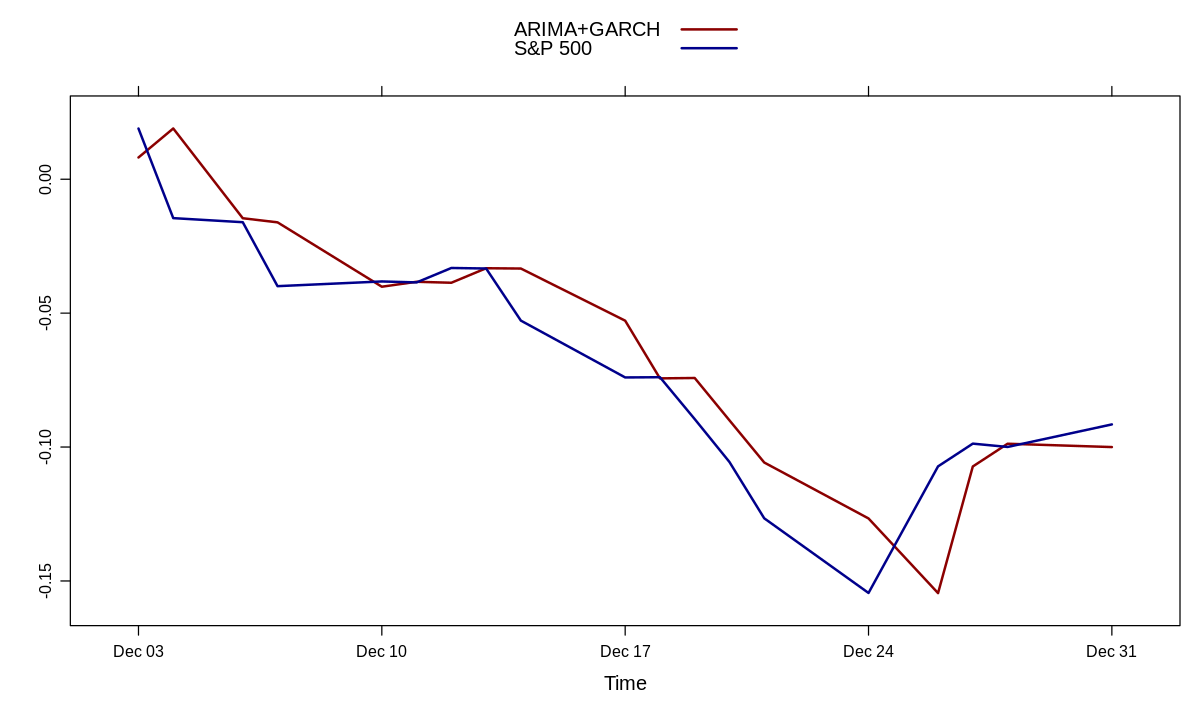

In [11]:
ag.plotvalues(pred, ret, 1)

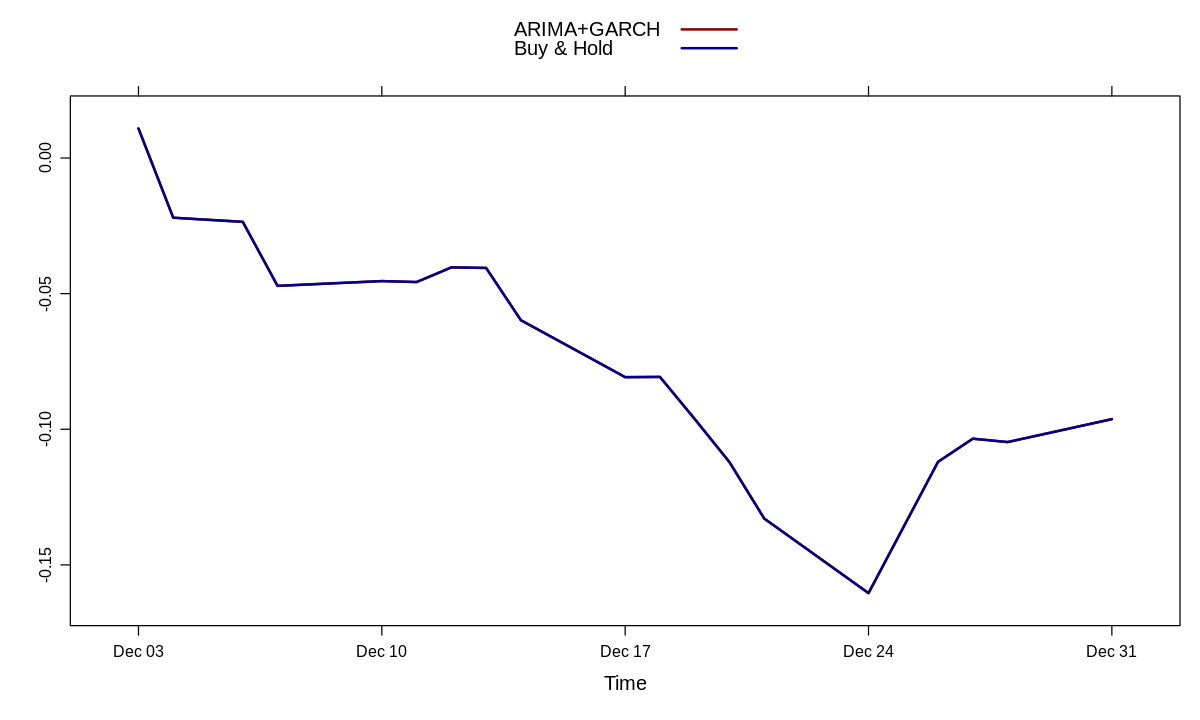

In [12]:
ag.backtest(pred, ret, 1)

### Debugging ag.plotvalues

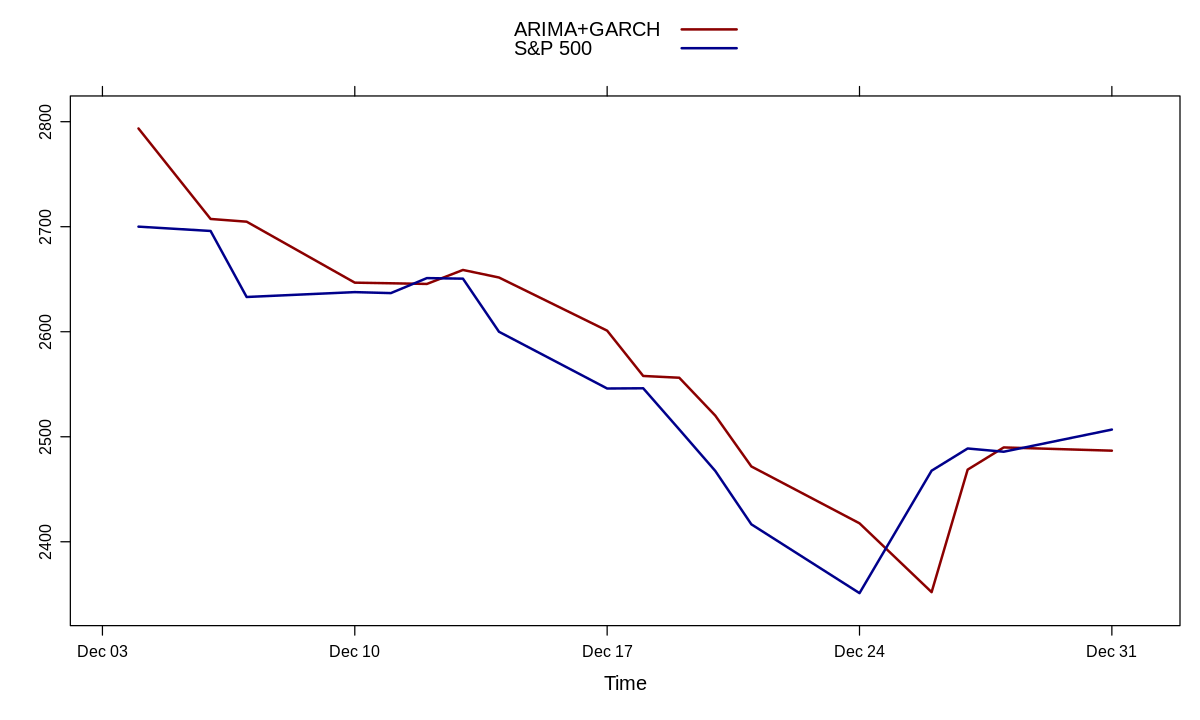

In [21]:
lookahead <- 1
label='S&P 500'


x <- Cl(GSPC)[index(result)]

# merge first to set the period of ret same as that of pred
result <- merge(pred, x, all=F )
# get value proportional to index from log return
trueCurve <- result[,2]
# calc index prediction
predCurve <- exp(result[,1]) * trueCurve
# shift prediction for lookahead
predCurve <- lag(predCurve, lookahead)
predCurve <- predCurve[!is.na(predCurve)]  
result <- merge(predCurve, trueCurve, all=F )
xyp <- ag.plot(result, labels=c("ARIMA+GARCH", label))
return(xyp)

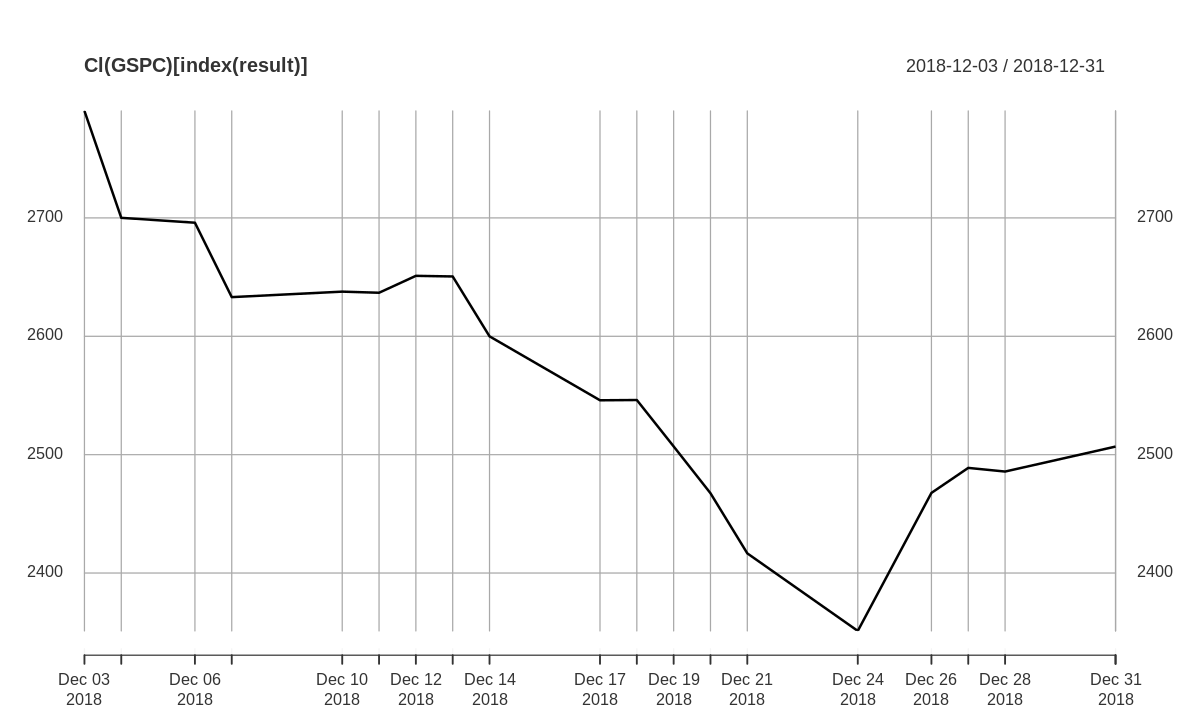

In [18]:
plot(Cl(GSPC)[index(result)])

## Weekly Log Return

Obtain the S&P500 returns

In [5]:
start <- "1991-01-01"
end <- "2020-12-31"

getSymbols("^GSPC", from=start, to=end)

[1] "^GSPC"

In [6]:
lag <- 5

spReturns <- diff(log(Cl(GSPC)), lag=lag)

spReturns[as.character(head(index(Cl(GSPC)),lag))] = 0

length(spReturns)

[1] 7558

Set dates for fitting & backtesting

In [7]:
# for backtesting
bt.start <- "2019-01-01"
bt.end <- "2019-12-31"
#bt.start <- "2018-01-01"
#bt.end <- "2018-12-31"

YEAR <- 252
windowLength <- 5*YEAR # for fitting

# calc foreLength
ret <- window(spReturns, end=bt.end)
foreLength <- nrow(window(ret, start=bt.start)) 

# finalize data for fitting & backtesting
l <- nrow(ret)
ret <- ret[(l-windowLength-foreLength):l]

In [8]:
pred <- ag.forecast(ret, foreLength, windowLength, lag)

[1] "20 % done (8 mins)."
[1] "40 % done (15 mins)."
[1] "60 % done (22 mins)."
[1] "81 % done (31 mins)."
[1] "100 % done (38 mins)."


In [11]:
my.figsize(10,6)

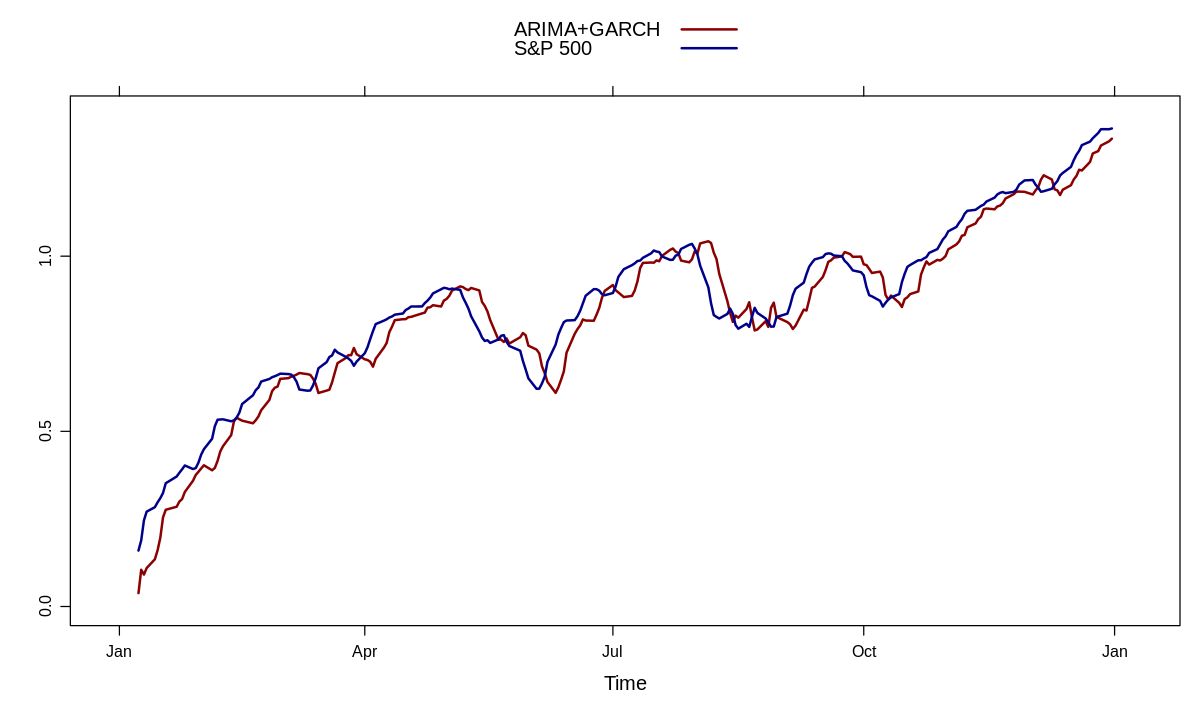

In [12]:
ag.plotvalues(pred, ret, lag)

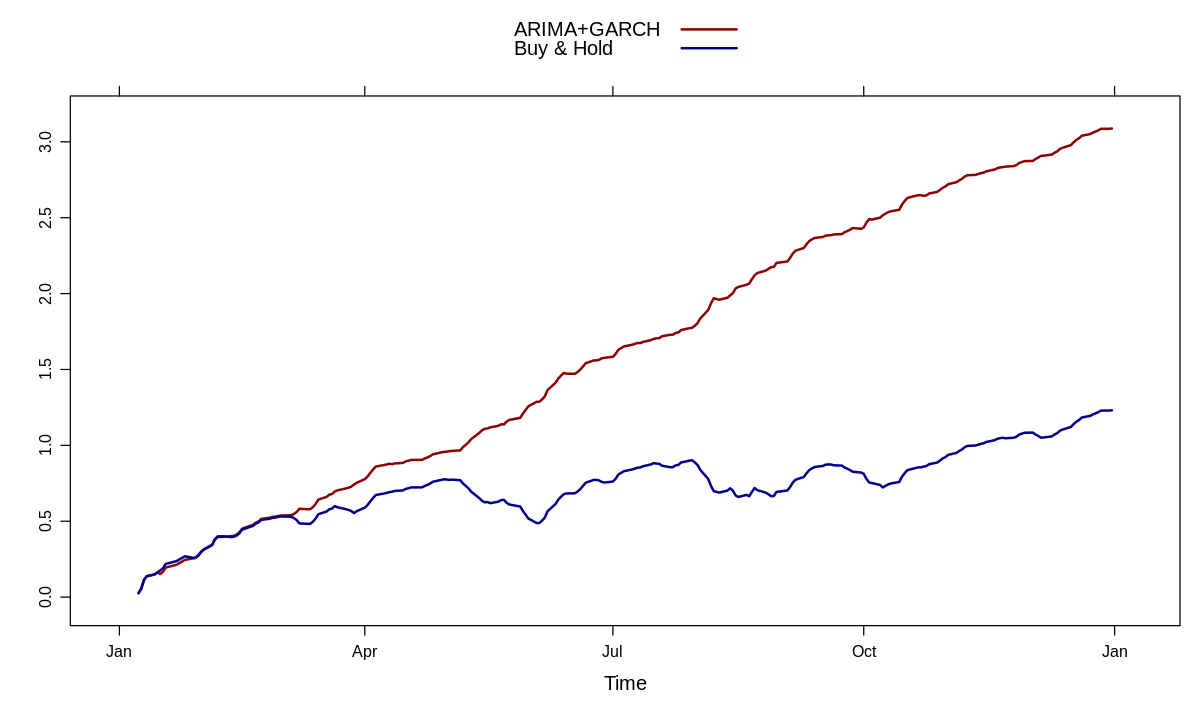

In [13]:
ag.backtest(pred, ret, lag)

### TESTING

In [143]:
lag <- 5

spReturns <- diff(log(Cl(GSPC)), lag=lag)

spReturns[as.character(head(index(Cl(GSPC)),lag))] = 0

length(spReturns)

[1] 7558

In [144]:
# for backtesting
bt.start <- "2019-03-01"
bt.end <- "2019-03-31"

YEAR <- 252
windowLength <- 5*YEAR # for fitting

# calc foreLength
ret <- window(spReturns, end=bt.end)
foreLength <- nrow(window(ret, start=bt.start)) 

# finalize data for fitting & backtesting
l <- nrow(ret)
ret <- ret[(l-windowLength-foreLength):l]

In [148]:
#(ret, foreLength, windowLength, lookahead) {


lookahead <- lag # period for ROC

# Create vectors to store the predictions
fc.pred <- vector(mode="numeric", length=foreLength)
fc.sigma <- vector(mode="numeric", length=foreLength)
fc.dates <- vector(mode="character", length=foreLength)

# step to print output
print.step <- round((foreLength+1)/5)

start_time <- Sys.time()

for (d in 1:(foreLength+1)) {

    # Obtain the S&P500 rolling window for this day
    retOffset <- ret[d:(windowLength+d)]

    # Fit the ARIMA model
    fit <- tryCatch(auto.arima(retOffset, seasonal=FALSE, 
                               ic='aicc', 
                               #ic='aic', 
                               d=0, 
                               trace=FALSE),
                    error=function(err) {FALSE},
                    warning=function(err) {FALSE} )

    if( !is.logical(fit) ) {
        final.order <- as.numeric(arimaorder(fit))
    } else {
        final.order <- c(0,0,0)
    }

    # Specify and fit the GARCH model
    spec <- ugarchspec(
        variance.model=list(garchOrder=c(1,1)),
        mean.model=list(armaOrder=c(final.order[1], final.order[3]), include.mean=T),
        distribution.model="sged"
    )
    fit <- tryCatch(ugarchfit(spec, retOffset, solver='hybrid'), 
                    error=function(e) {e}, 
                    warning=function(w) {w})

    # If the GARCH model does not converge, set the direction to "long" else
    # choose the correct forecast direction based on the returns prediction
    # Output the results to the screen and the forecasts vector
    if(is(fit, "warning")) {
        fc.pred[d] <- 0 # assume zero return
        fc.sigma[d] <- 0
        fc.dates[d] <- as.character(index(tail(retOffset, 1)[1]))
    } else {
        fore <- ugarchforecast(fit, n.ahead=1)
        ind <- fore@forecast$seriesFor
        sig <- fore@forecast$sigmaFor
        # save d + lookahead prediction at d date
        fc.pred[d] <- ind[1]
        fc.sigma[d] <- sig[1]
        fc.dates[d] <- colnames(ind)
    }

    if ((d %% print.step == 0) | (d == foreLength+1)) {
        a <- Sys.time() - start_time
        u <- attr(a, "units")
        v <- as.numeric(a)
        print(sprintf("%0.0f %% done (%0.0f %s).", 100 * d/(foreLength+1), v, u))
    }
    
    
}

In [150]:
pred <- xts(cbind(fc.pred, fc.sigma), order.by=as.Date(fc.dates, "%Y-%m-%d"))
colnames(pred) <- c(paste('prediction T+', lookahead, sep=''), paste('sigma T+', lookahead, sep=''))

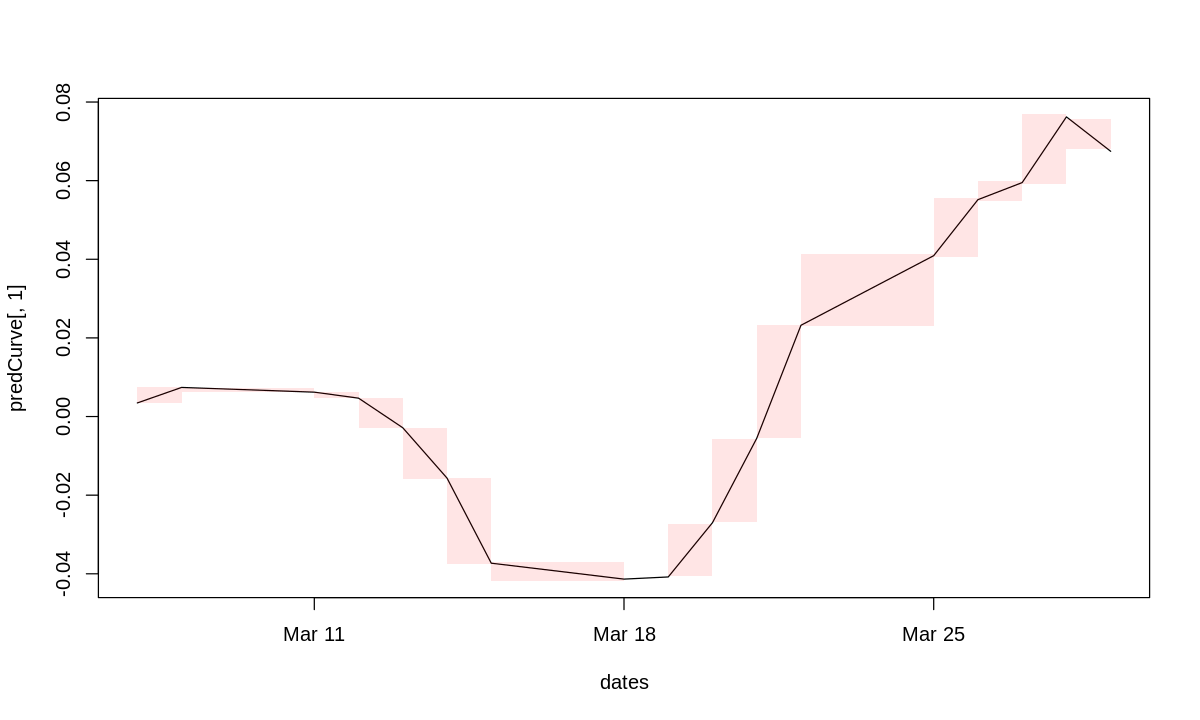

In [313]:
ag.plot <- function(data, 
                    labels=c("ARIMA+GARCH", "Buy & Hold"),
                    colors=c("darkred", "darkblue")) {
    xyp <- xyplot( 
        data,
        superpose=T,
        col=colors,
        lwd=2,
        key=list(
            text=list(labels),
            lines=list(lwd=2, col=colors)
        )
    )

    return(xyp)
}



ag.plotvalues <- function(pred, ret, lookahead, label='S&P 500') {
    # merge first to set the period of ret same as that of pred
    result <- merge(pred, ret, all=F )
    # get value proportional to index from log return
    trueCurve <- log( cumprod( 1 + result[,2] ) )
    # calc index prediction
    predCurve <- exp(result[,1]) * trueCurve
    # shift prediction for lookahead
    predCurve <- lag(predCurve, lookahead)
    predCurve <- predCurve[!is.na(predCurve)]  
    result <- merge(predCurve, trueCurve, all=F )
    xyp <- ag.plot(result, labels=c("ARIMA+GARCH", label))
    return(xyp)
}


#ag.plotvalues <- function(pred, ret, lookahead, label='S&P 500') {

lookahead <- lag
label <- 'S&P 500'

# set the period of ret same as that of pred
ret <- ret[index(pred)]
# get value proportional to index from log return
trueCurve <- log( cumprod( 1 + ret ) )

# get sigma bands of roc
mu <- pred[,1]
sigma <- pred[,2]
Zup = mu + 1*sigma
Zdn = mu - 1*sigma
predCurve <- mu
predCurve <- merge(predCurve, Zup)
predCurve <- merge(predCurve, Zdn)
colnames(predCurve) <- c('mu','Zup','Zdn')

# calc index prediction
predCurve <- exp(predCurve) * rep(trueCurve,3)
# shift prediction for lookahead
predCurve <- lag(predCurve, lookahead)
predCurve <- na.omit(predCurve)


dates <- index(predCurve)
Zup <- predCurve[,2]
Zdn <- predCurve[,3]
plot(dates, predCurve[,1], type='l')
n <- nrow(predCurve)
for(i in 2:n) rect(dates[i-1], Zdn[i-1], dates[i], Zup[i], border=NA,
                   #col = colors()[130], 
                   col= rgb(1,0,0, alpha=0.1),
                   density=NULL)
#lines(dates, predCurve[,1])
#box()
#grid()

In [332]:
i <- 2
dates[i-1]
Zdn[i-1]
dates[i]
Zup[i]

[1] "2019-03-07"

                   Zdn
2019-03-07 0.003433467

[1] "2019-03-08"

                   Zup
2019-03-08 0.007452279

In [333]:
head(pred)

head(predCurve)

           prediction T+5   sigma T+5
2019-02-28   0.0020063762 0.007188583
2019-03-01   0.0027383432 0.006756354
2019-03-04  -0.0004236045 0.006627026
2019-03-05  -0.0011118972 0.006155482
2019-03-06  -0.0056855692 0.006373380
2019-03-07  -0.0093876370 0.006760844

                     mu          Zup          Zdn
2019-03-07  0.003458237  0.003483187  0.003433467
2019-03-08  0.007402099  0.007452279  0.007352256
2019-03-11  0.006197608  0.006238816  0.006156672
2019-03-12  0.004671548  0.004700392  0.004642880
2019-03-13 -0.002859005 -0.002877284 -0.002840841
2019-03-14 -0.015663890 -0.015770150 -0.015558346

In [279]:
library(ggplot2)

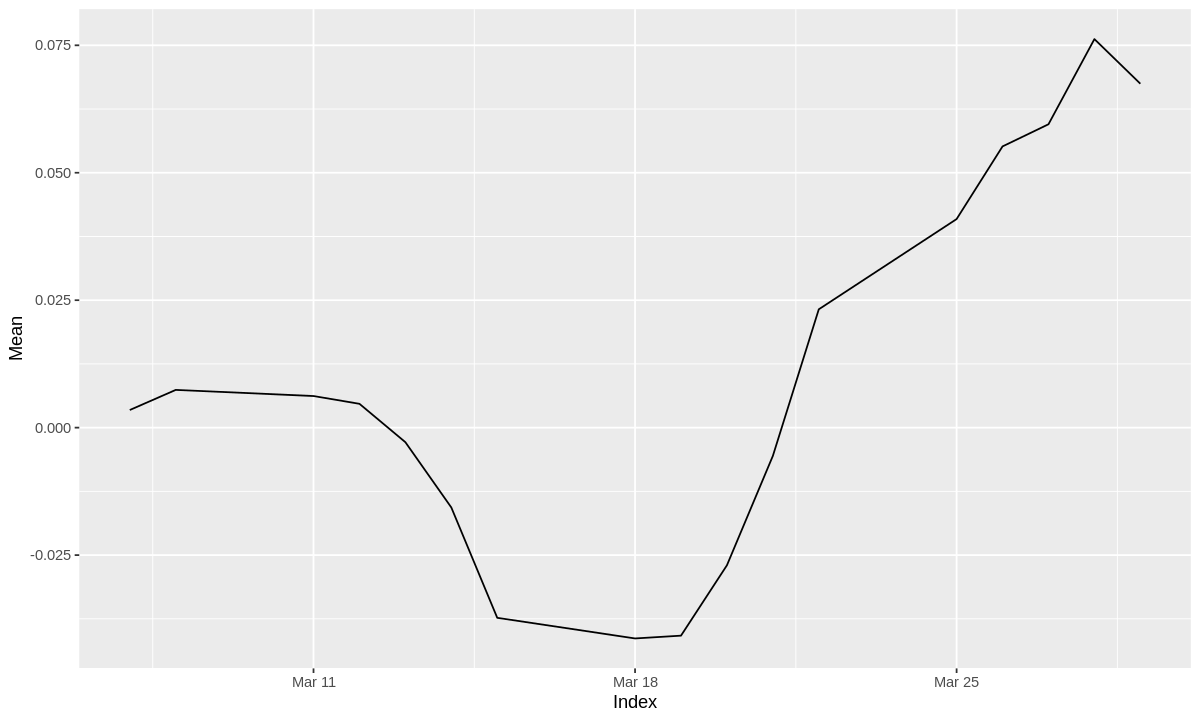

In [348]:
x <- predCurve
colnames(x) <- c('Mean', 'Zup', 'Zdn')

ggplot(x, aes(Index, Mean)) + 
geom_ribbon(aes(ymin = Zdn, ymax = Zup), fill = "steelblue2") + 
geom_line(color = "firebrick", size = 1)
#geom_line()

In [330]:
(x[,1] - x[,2])/x[,1] * 100

                 Mean
2019-03-07 -0.7214483
2019-03-08 -0.6779229
2019-03-11 -0.6649033
2019-03-12 -0.6174466
2019-03-13 -0.6393733
2019-03-14 -0.6783750
2019-03-15 -0.8064984
2019-03-18 -0.9104676
2019-03-19 -0.8390266
2019-03-20 -0.8629311
2019-03-21 -0.8439324
2019-03-22 -0.8054953
2019-03-25 -0.7653590
2019-03-26 -0.7199107
2019-03-27 -0.6858176
2019-03-28 -0.8656905
2019-03-29 -0.9698498

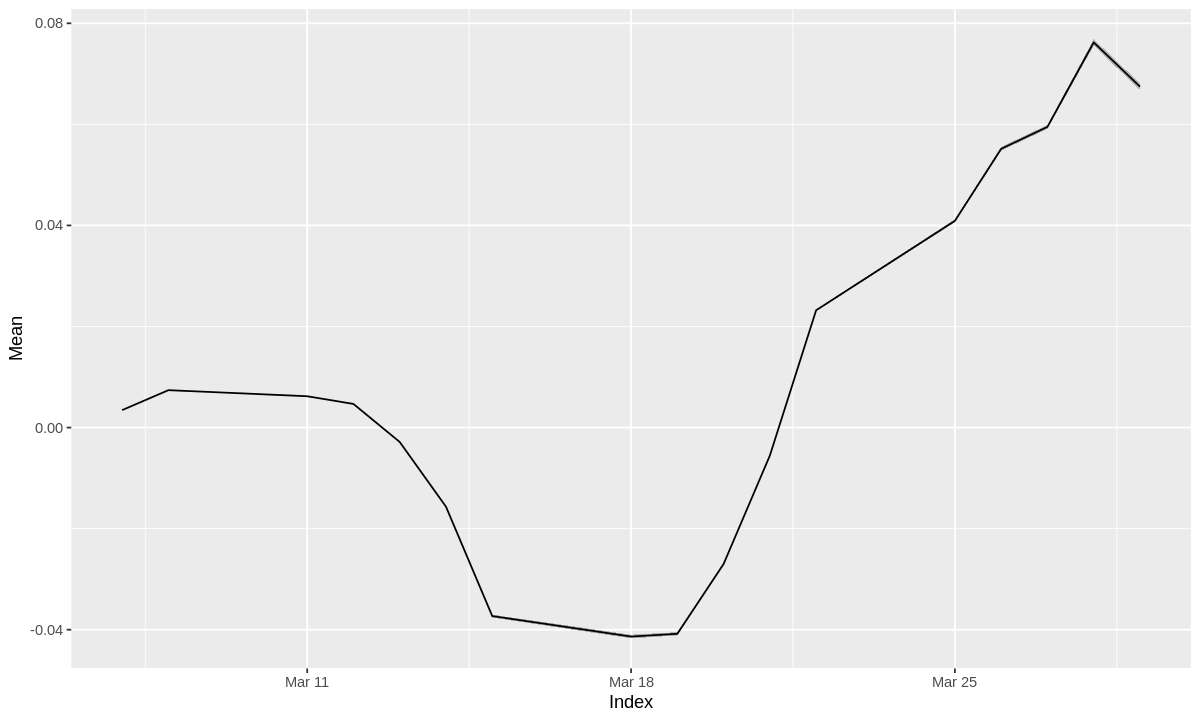

In [322]:
h <- ggplot(x, aes(Index))
h +
  geom_ribbon(aes(ymin = Zdn, ymax = Zup), fill = "grey70") +
  geom_line(aes(y = Mean))

In [318]:
head(x)

                   Mean          Zup          Zdn
2019-03-07  0.003458237  0.003483187  0.003433467
2019-03-08  0.007402099  0.007452279  0.007352256
2019-03-11  0.006197608  0.006238816  0.006156672
2019-03-12  0.004671548  0.004700392  0.004642880
2019-03-13 -0.002859005 -0.002877284 -0.002840841
2019-03-14 -0.015663890 -0.015770150 -0.015558346

In [305]:
predCurve[1:5]

                     mu          Zup          Zdn
2019-03-07  0.003458237  0.003483187  0.003433467
2019-03-08  0.007402099  0.007452279  0.007352256
2019-03-11  0.006197608  0.006238816  0.006156672
2019-03-12  0.004671548  0.004700392  0.004642880
2019-03-13 -0.002859005 -0.002877284 -0.002840841

In [307]:
pred[6:10]

           prediction T+5   sigma T+5
2019-03-07  -0.0093876370 0.006760844
2019-03-08  -0.0161021873 0.008032636
2019-03-11   0.0005699824 0.009063478
2019-03-12   0.0035691455 0.008355263
2019-03-13   0.0142945844 0.008592292

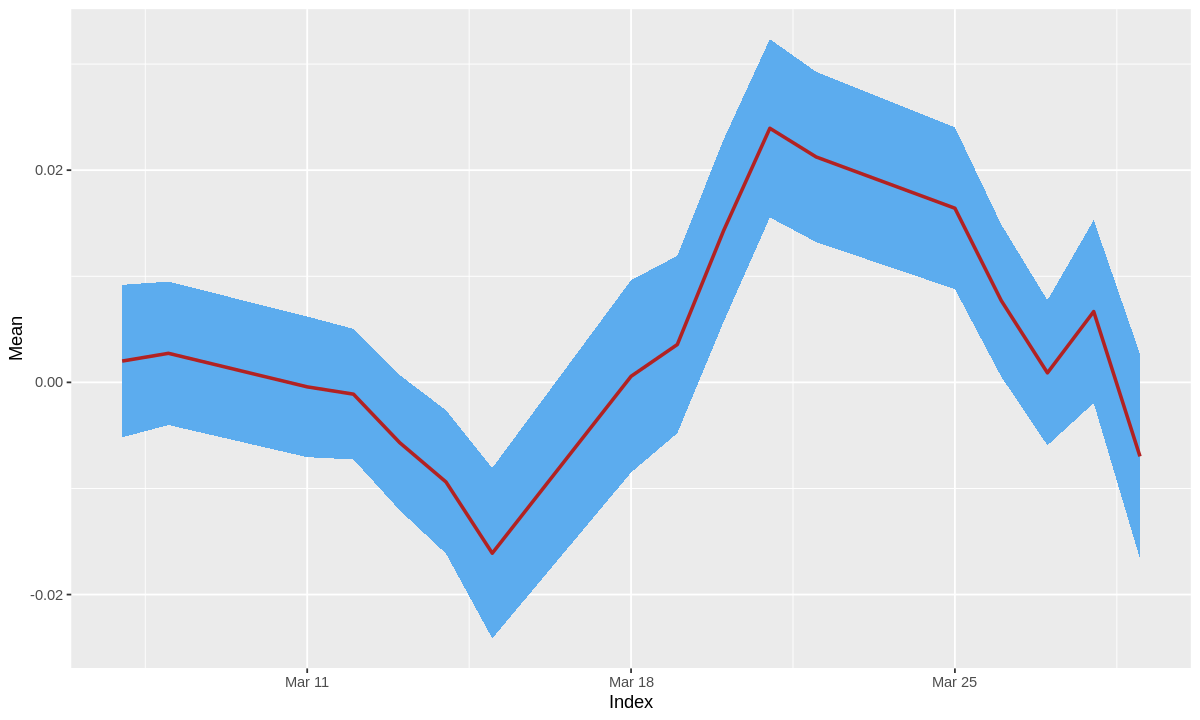

In [301]:
# plot of roc, not s&p index

x <- lag(pred, lookahead)
x <- na.omit(x)
colnames(x) <- c('Mean', 'Sigma')

ggplot(x, aes(Index, Mean)) + 
geom_ribbon(aes(ymin = Mean - Sigma,
                ymax = Mean + Sigma), # shadowing cnf intervals
            fill = "steelblue2") + 
geom_line(color = "firebrick", size = 1) # point estimate


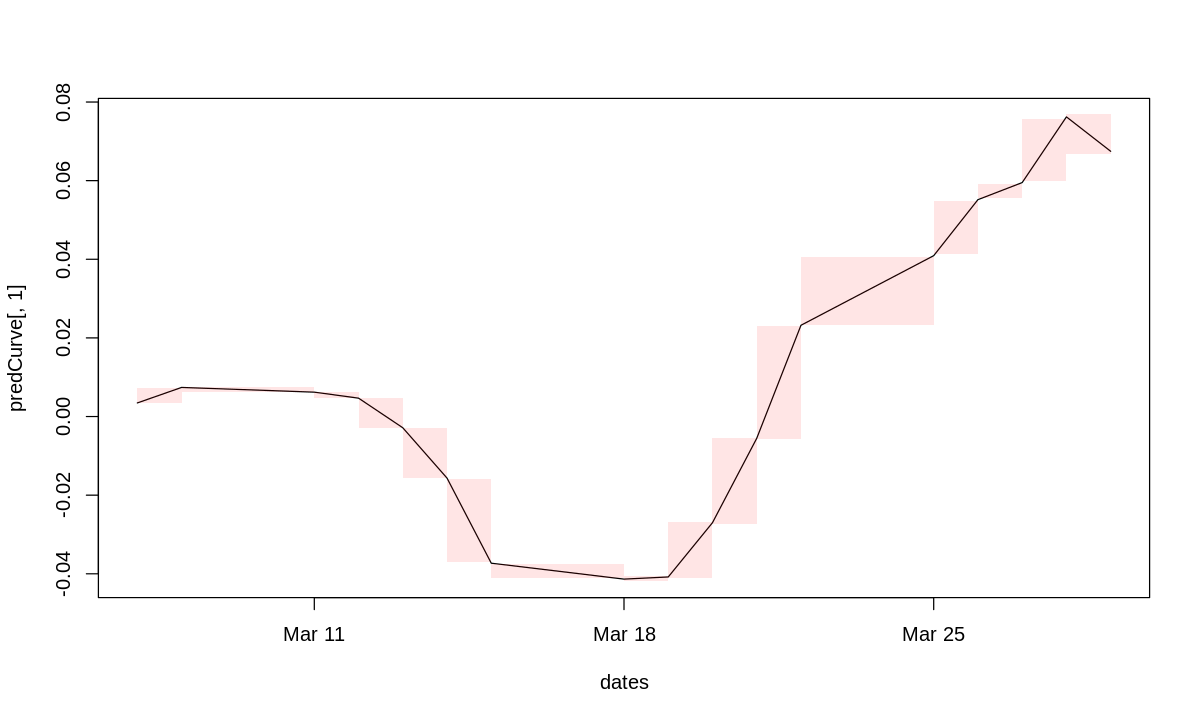

In [295]:
dates <- index(predCurve)
plot(dates, predCurve[,1], type='l')


Zdn <- predCurve[,2]
Zup <- predCurve[,3]

n <- nrow(predCurve)
for(i in 2:n) rect(dates[i-1], Zdn[i-1], dates[i], Zup[i], border=NA,
                   #col = colors()[130], 
                   col= rgb(1,0,0, alpha=0.1),
                   density=NULL)
#lines(dates, predCurve[,1])
#box()
#grid()

In [172]:
result <- merge(predCurve, trueCurve, all=F )
xyp <- ag.plot(result, labels=c("ARIMA+GARCH", label))
#return(xyp)
#}
xyp

In [256]:
#apply(exp(predCurve), )

#apply(exp(predCurve), 1, function(r) {r* trueCurve})
#sapply(exp(predCurve), function(r) {r* trueCurve})
#apply(exp(predCurve), 1, max)


2019-02-28 2019-03-01 2019-03-04 2019-03-05 2019-03-06 2019-03-07 2019-03-08 
 1.0092374  1.0095399  1.0062227  1.0050563  1.0006880  0.9973767  0.9919629 
2019-03-11 2019-03-12 2019-03-13 2019-03-14 2019-03-15 2019-03-18 2019-03-19 
 1.0096800  1.0119958  1.0231508  1.0328810  1.0297008  1.0243257  1.0150027 
2019-03-20 2019-03-21 2019-03-22 2019-03-25 2019-03-26 2019-03-27 2019-03-28 
 1.0077622  1.0154107  1.0026788  1.0002533  1.0038348  1.0053163  1.0043879 
2019-03-29 
 1.0210188

In [246]:
mu <- pred[,1]
sigma <- pred[,2]
Zup = mu + 1*sigma
Zdn = mu - 1*sigma
predCurve <- mu
predCurve <- merge(predCurve, Zup)
predCurve <- merge(predCurve, Zdn)
colnames(predCurve) <- c('mu','Zup','Zdn')
predCurve

                      mu           Zup           Zdn
2019-02-28  0.0020063762  0.0091949589 -0.0051822064
2019-03-01  0.0027383432  0.0094946970 -0.0040180106
2019-03-04 -0.0004236045  0.0062034216 -0.0070506305
2019-03-05 -0.0011118972  0.0050435848 -0.0072673791
2019-03-06 -0.0056855692  0.0006878104 -0.0120589488
2019-03-07 -0.0093876370 -0.0026267932 -0.0161484808
2019-03-08 -0.0161021873 -0.0080695516 -0.0241348229
2019-03-11  0.0005699824  0.0096334608 -0.0084934961
2019-03-12  0.0035691455  0.0119244088 -0.0047861178
2019-03-13  0.0142945844  0.0228868760  0.0057022929
2019-03-14  0.0239480744  0.0323519861  0.0155441628
2019-03-15  0.0212455866  0.0292682714  0.0132229019
2019-03-18  0.0164100481  0.0240344976  0.0087855986
2019-03-19  0.0077179676  0.0148912849  0.0005446502
2019-03-20  0.0008974495  0.0077322154 -0.0059373164
2019-03-21  0.0066735281  0.0152931769 -0.0019461206
2019-03-22 -0.0069765054  0.0026752638 -0.0166282746
2019-03-25 -0.0102306502  0.0002532768 -0.0207

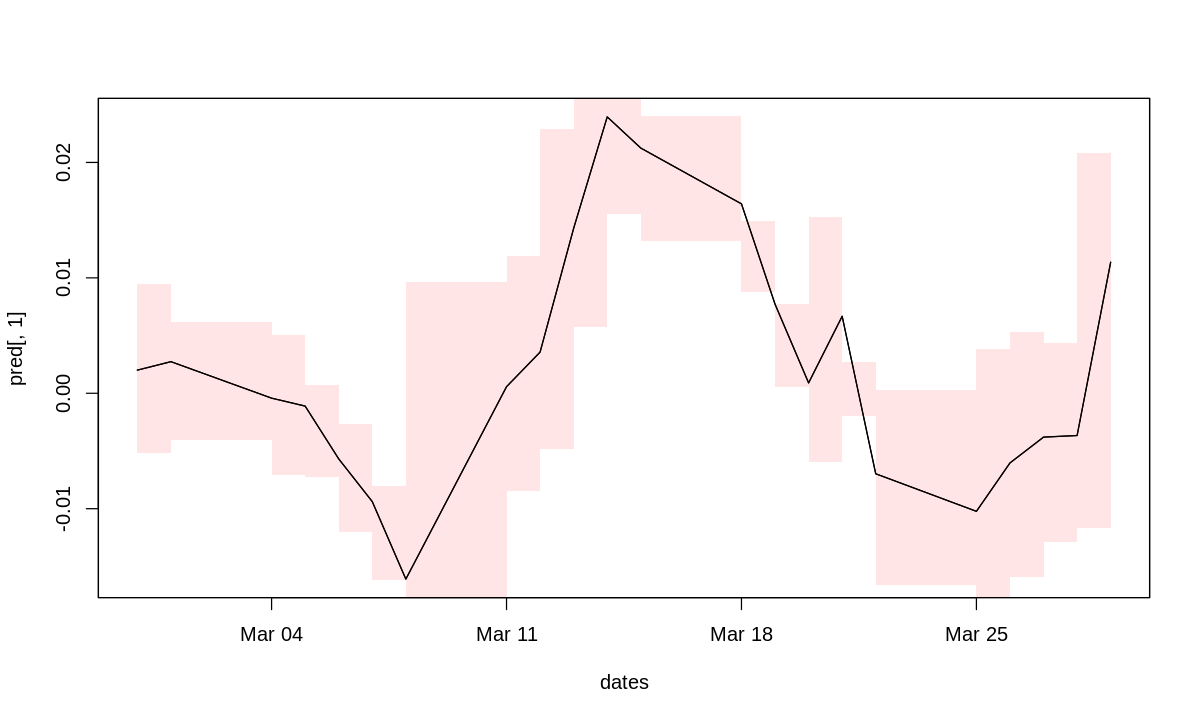

In [223]:
i = 3

dates <- index(pred[,1])
plot(dates, pred[,1], type='l')

n <- nrow(pred)
Zup = pred[,1] + 1*pred[,2]
Zdn = pred[,1] - 1*pred[,2]
for(i in 2:n) rect(dates[i-1], Zdn[i-1], dates[i], Zup[i], border=NA,
                   #col = colors()[130], 
                   col= rgb(1,0,0, alpha=0.1),
                   density=NULL)
lines(dates, pred[,1])
box()
#grid()

In [130]:
my.figsize(10,6)

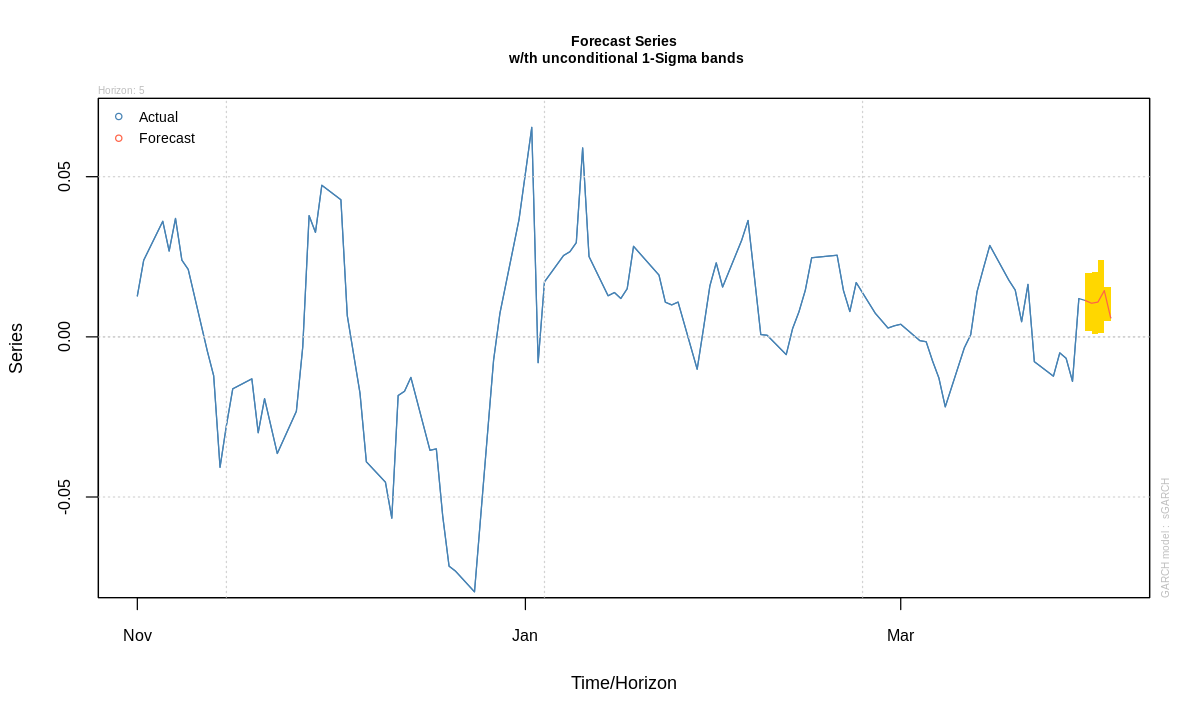

In [131]:
x <- fore
n.roll <- 5

vmodel = x@model$modeldesc$vmodel
# 1. Time Series:
nr = x@forecast$n.roll
if(n.roll > nr) stop("plot-->error: n.roll choice is invalid", call. = FALSE)
n = x@forecast$n.ahead
N = x@forecast$N - x@forecast$n.start
forseries = x@forecast$seriesFor[,n.roll+1]
forsigma = x@forecast$sigmaFor[,n.roll+1]
xdates = x@model$modeldata$index[(N+n.roll-min(N,100)):(N+n.roll)]
fdates = seq(tail(xdates,1), by = x@model$modeldata$period, length.out = n+1)[-1]
series = x@model$modeldata$data[(N+n.roll-min(N,100)):(N+n.roll)]

xforseries = c(series, forseries)
series = c(series, rep(NA, n))
ylim=c(0.95*min(xforseries,na.rm=TRUE), 1.05*max(xforseries,na.rm=TRUE))
plot(c(xdates, fdates), as.numeric(xforseries), type="l", col="steelblue",
        main = paste("Forecast Series\n w/th unconditional 1-Sigma bands", sep = "") ,
        ylab="Series",xlab="Time/Horizon", ylim = ylim, cex.main = 0.7, cex.axis = 0.8, cex.lab = 0.9)
abline(h = 0, col = "grey", lty = 3)
Zup = forseries+1*forsigma
Zdn = forseries-1*forsigma
for(i in 2:n) rect(fdates[i-1], Zdn[i-1], fdates[i], Zup[i], col = colors()[142], border=NA)
lines(c(xdates, fdates), series, col="steelblue")
lines(fdates, forseries, col="tomato1")
mtext(paste("GARCH model : ", vmodel), side = 4, adj = 0, padj=0, col = "gray", cex = 0.5)
if(vmodel=="fGARCH"){
    mtext(paste("fGARCH submodel: ", x@model$modeldesc$vsubmodel, sep = ""), side = 4, adj = 0, padj=1.5, col = "gray", cex = 0.5)
    mtext(paste("Horizon: ",n,sep=""), side = 3, adj = 0, col = "gray", cex = 0.5)
} else{
    mtext(paste("Horizon: ",n,sep=""), side = 3, adj = 0, col = "gray", cex = 0.5)
}
lg.txt = c("Actual","Forecast")
legend("topleft", legend = lg.txt, col = c("steelblue", "tomato1"), y.intersp = 1.5, pch = 21, cex = 0.7, bty="n")
box()
grid()

In [39]:
tail(retOffset)

             GSPC.Close
2019-03-22 -0.007742981
2019-03-25 -0.012281451
2019-03-26 -0.004993828
2019-03-27 -0.006700275
2019-03-28 -0.013911236
2019-03-29  0.011957297

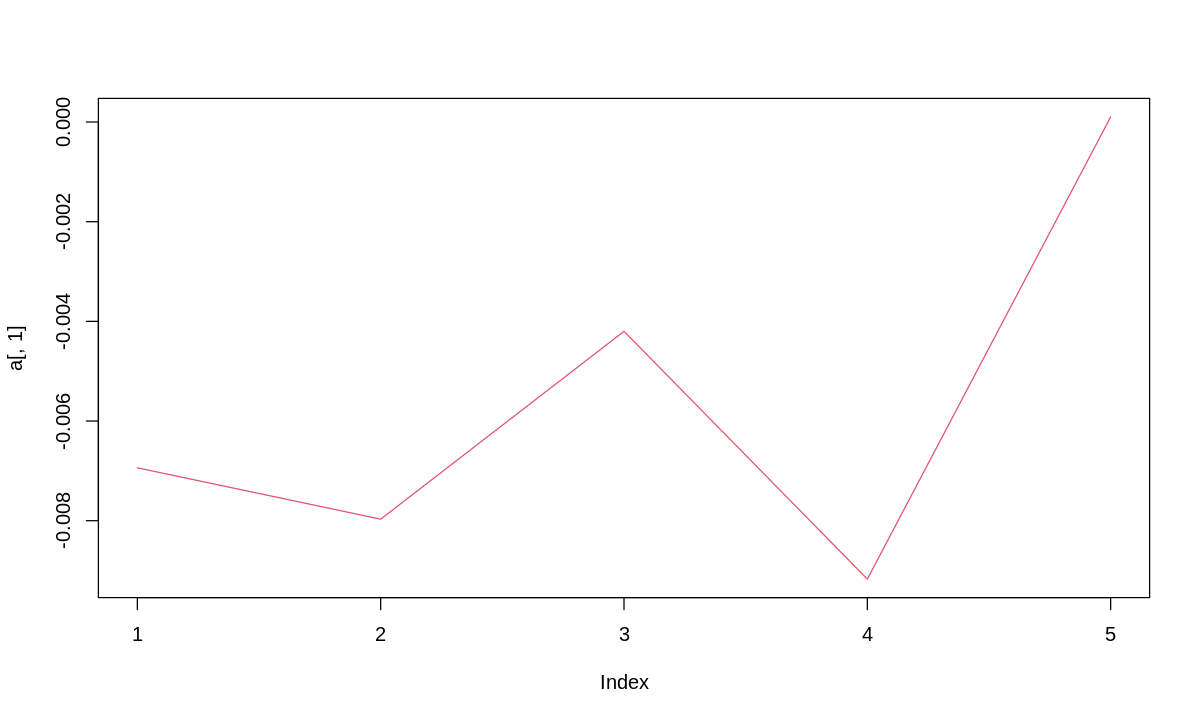

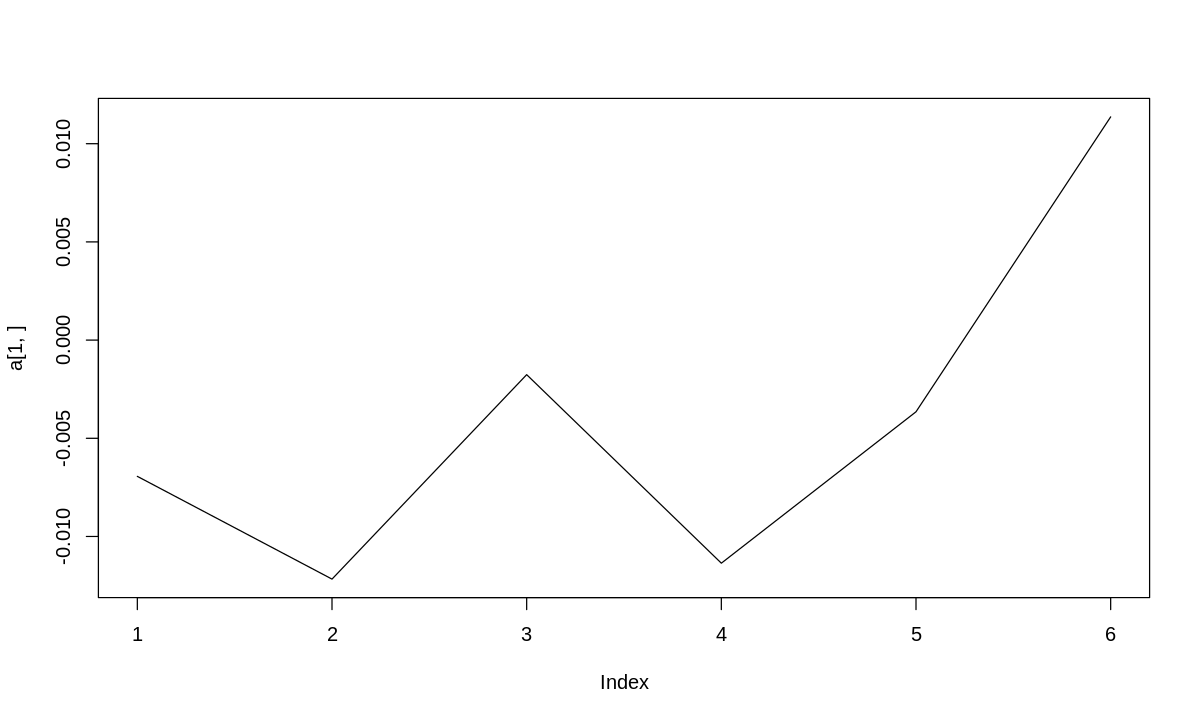

In [65]:
my.figsize(10,6)
plot(a[,1], col = 2, type='l')

#plot(a[1,], type='l')

In [42]:
lookahead <- 5
fit <- ugarchfit(spec, retOffset, solver='hybrid', out.sample=lookahead)
fore <- ugarchforecast(fit, n.ahead=lookahead, n.roll=lookahead)

In [124]:
my.figsize(20,12)

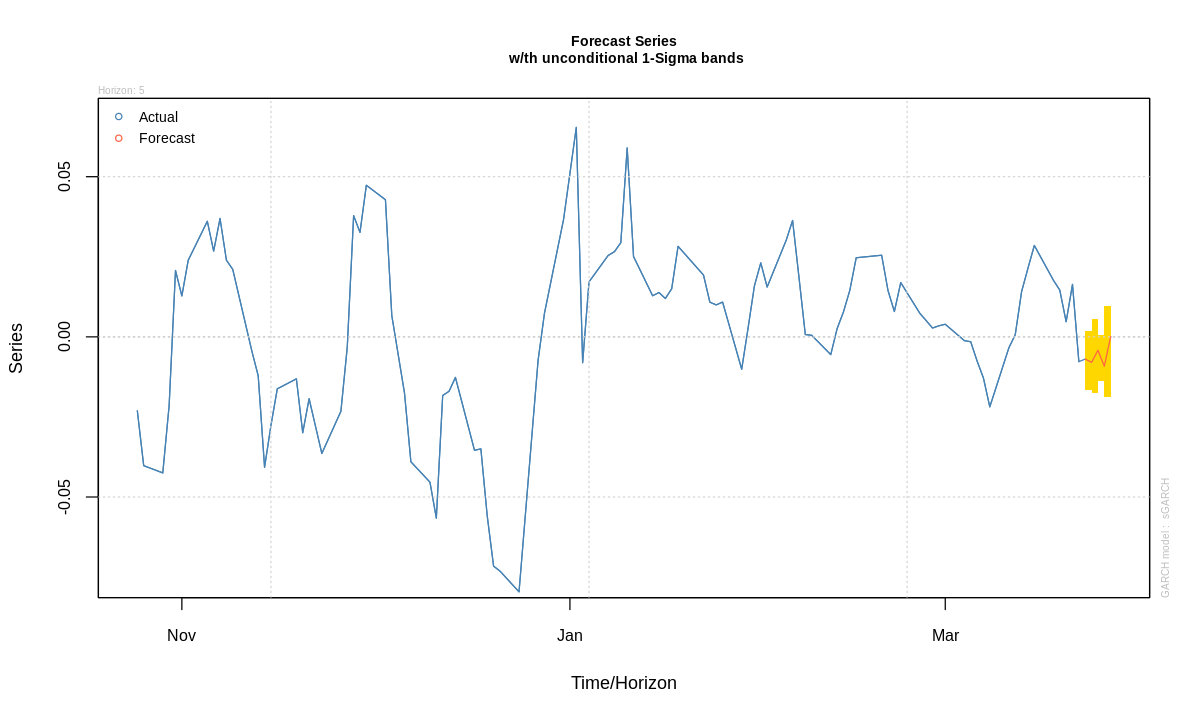

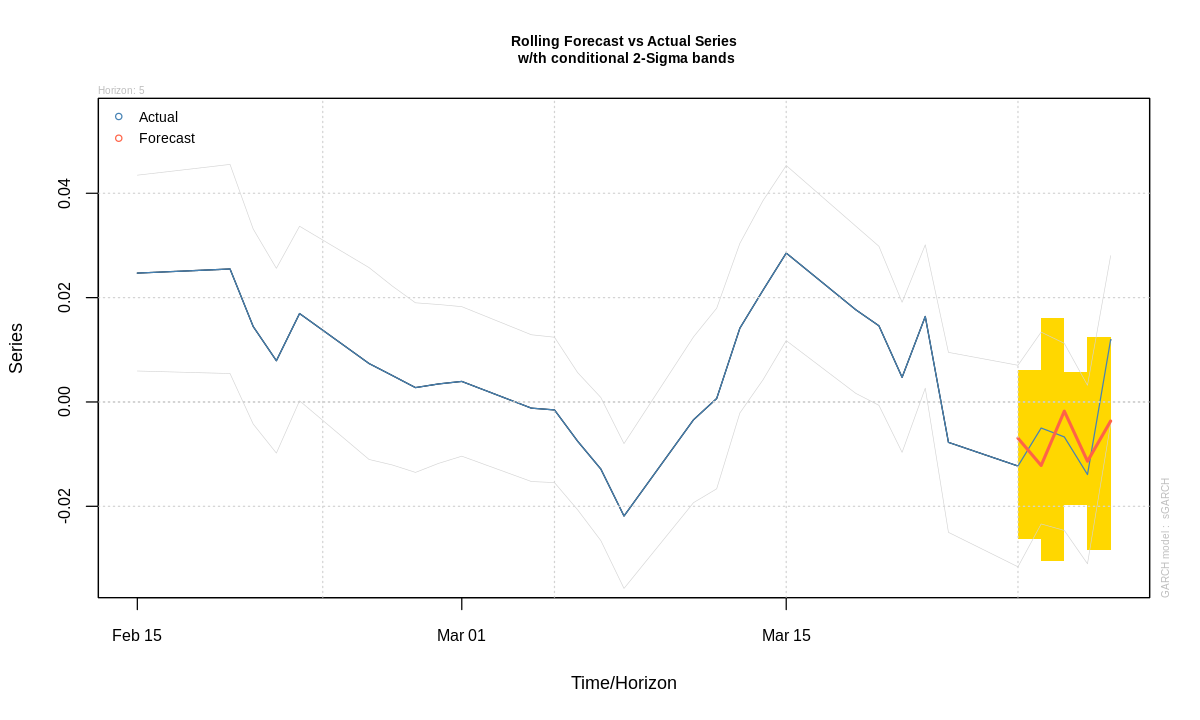

In [133]:
#plot(fore, which="all")
plot(fore, which=1)
#lines(c[,c(1,3,4)])
plot(fore, which=2)


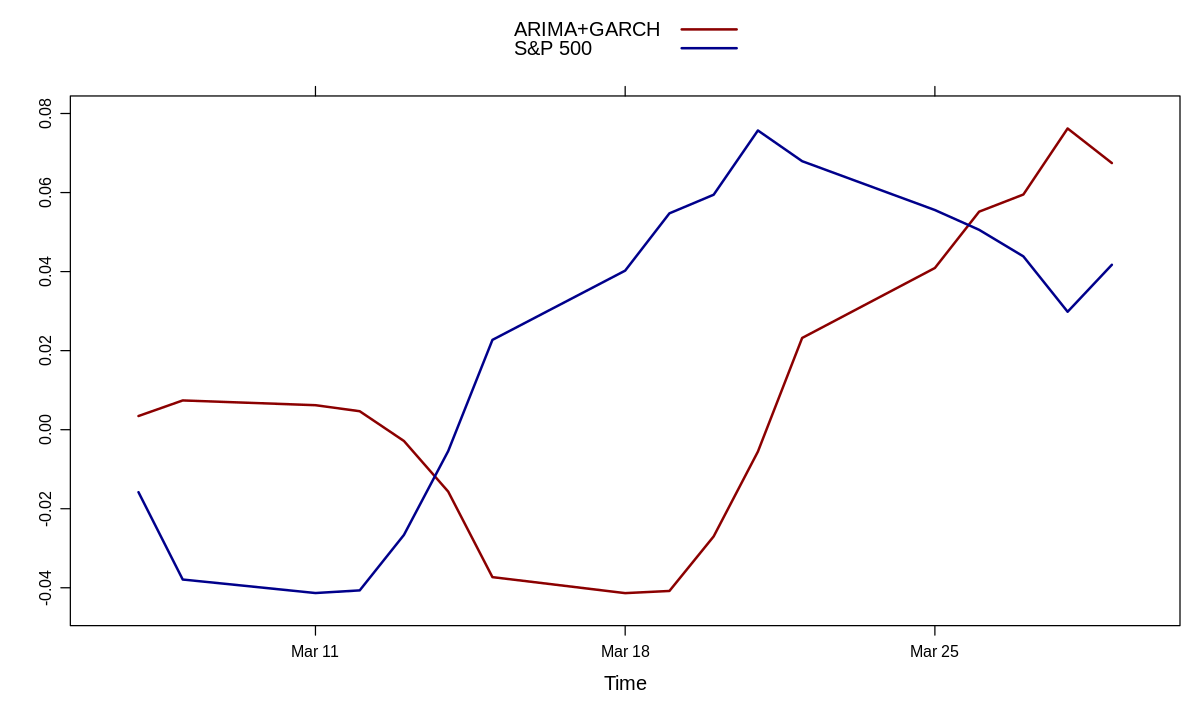

In [20]:
ag.plotvalues(pred, ret, lag)

In [335]:
cumsum(1:10)
cumprod(1:10)

[1]  1  3  6 10 15 21 28 36 45 55

[1]       1       2       6      24     120     720    5040   40320  362880
[10] 3628800

### TESTING

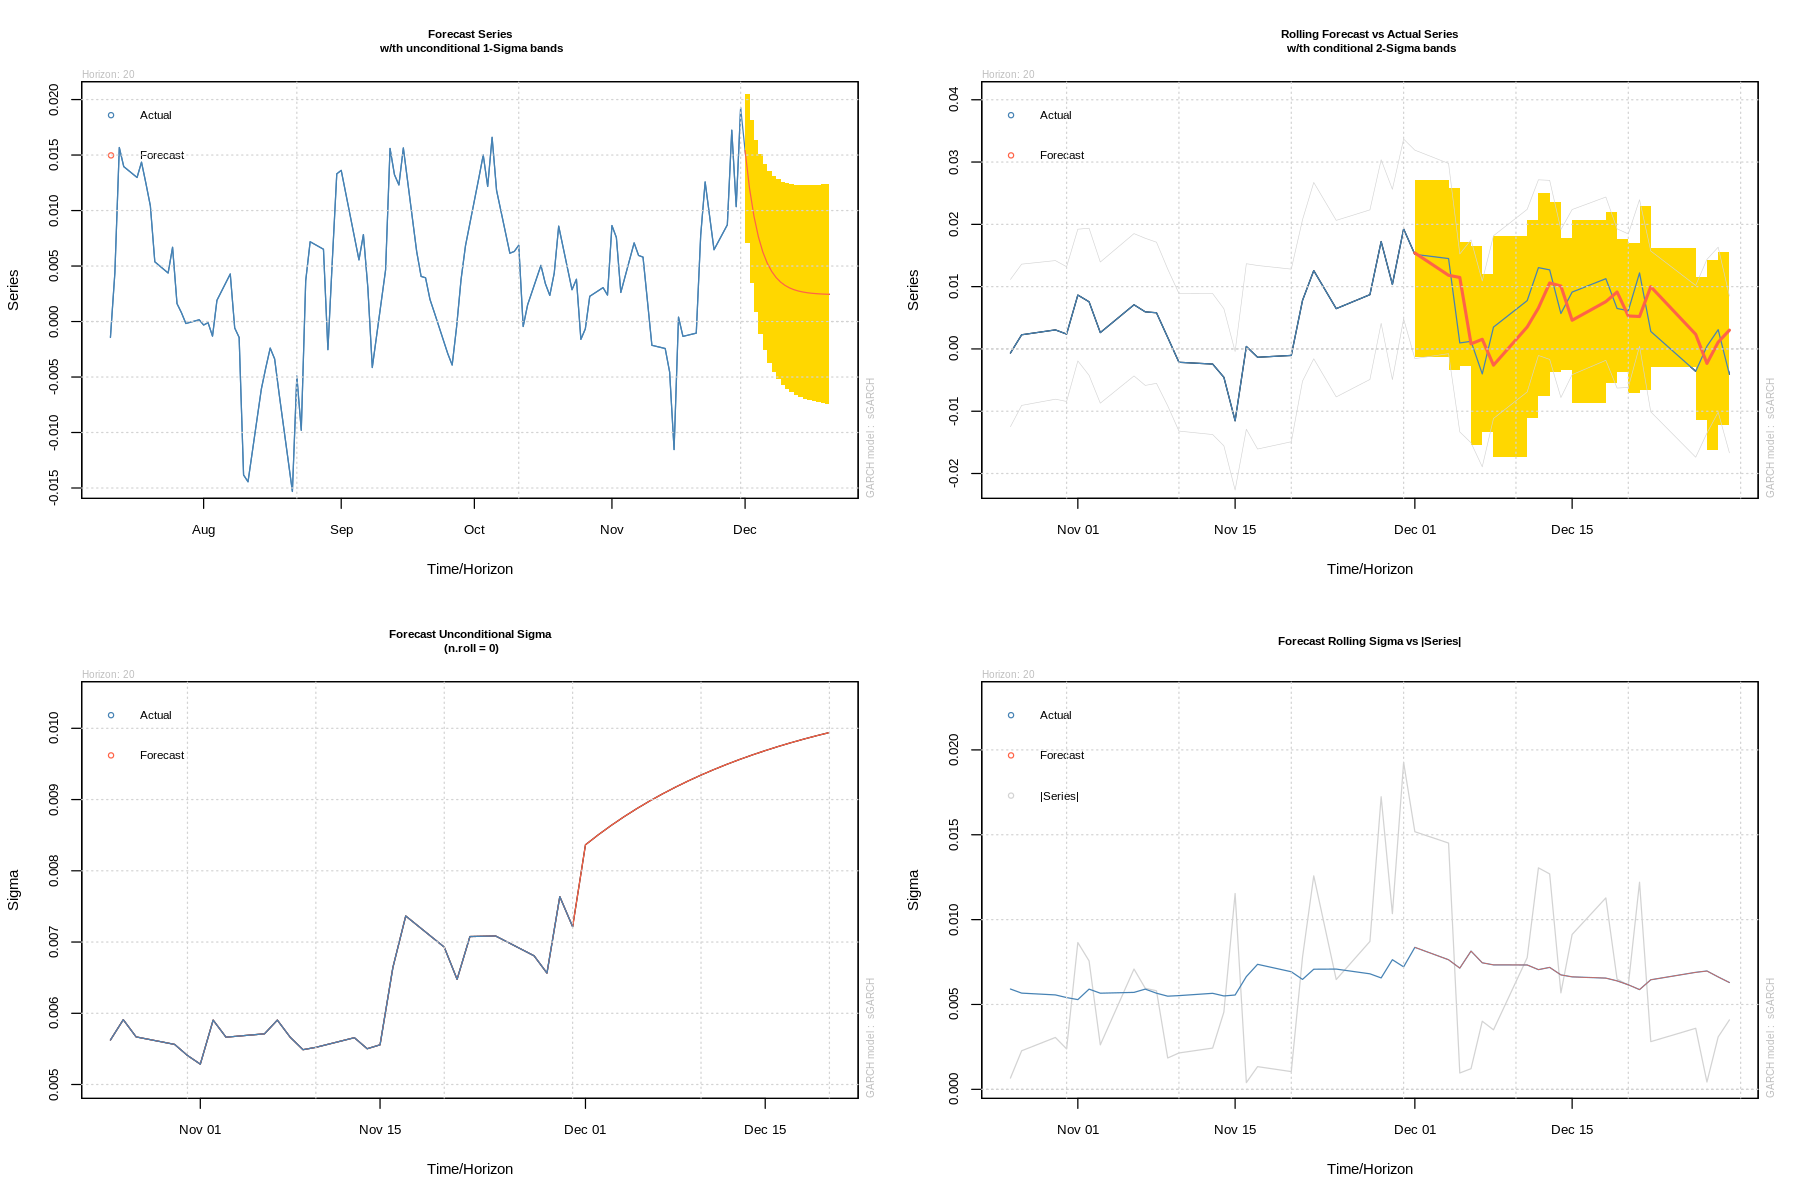

In [55]:
lookahead <- 20
fit <- ugarchfit(spec, retOffset, solver='hybrid', out.sample=lookahead)
fore <- ugarchforecast(fit, n.ahead=lookahead, n.roll=lookahead)
plot(fore, which="all")